Participants are requested to develop machine learning models that predict critical elements of race strategies for drivers in the 2024 Mexican Grand Prix. The models should integrate historical data from past Mexican Grand Prix races and updated data from the 2024 race season. The predictions should target four critical factors based on each driver's starting grid position and any other information available before the race (e.g: weather):


**Number of Stints:** Accurately predicting the number of stints for a given driver.


**Tire Compound Prediction:** Predicting the tire compounds used in each stint.



**Laps per Stint:** Predicting the number of laps within each stint.


**Average Lap Time per Stint**: Matching predicted average lap times to actual performance.


The model should allow evaluators to input a specific driver, the grid position as well as any other information available before the race to run predictions. Depending on their approach, participants can design the model to run for an individual driver or the entire grid. The model should also account for variations in driver strategies. For example, suppose a typically slower car qualifies unexpectedly high on the grid due to external factors like rain. In that case, its strategy may shift towards defense rather than speed, aiming to fend off faster competitors.

**Note:
You will need to provide your model in a .pkl format along with clear guidelines outlining how the input should be structured. The Ocean team will run your model with this data and evaluate it according to the accuracy of its results.**

In [ ]:
!unzip /content/drive/MyDrive/formula1-Singapore/Mexican-GP-Data-Challenge-Datasets.zip -d /content/drive/MyDrive/formula1-Singapore/

In [ ]:

!unzip /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024.zip -d /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/


Archive:  /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024.zip
   creating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/car_data_2024.csv  
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/circuit_2024.csv  
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/control_message_2024.csv  
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/lap_2024.csv  
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/position_2O24.csv  
  inflating: /content/drive/MyDrive/formula1-Singapore/ocean_mexican_gp_data_challenge_datasets/races_2024/result_2024.csv  
  inflating: /content/d

# mount the drive and load libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/formula1-Singapore'
os.chdir(folder_path)

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [5]:
def convert_to_timedelta(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_timedelta(df[col])
    return df

def conver_to_datetime(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_datetime(df[col])
    return df

def conver_deltatime_to_second (df , columns_name):
    for col in columns_name:
        df[f'{col}_in_sec'] = df[col].dt.total_seconds()
    return df

In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
colors = {
    "Bold Red": "#FF0000",
    "Bold Green": "#00FF00",
    "Bold Blue": "#0000FF",
    "Bold Yellow": "#FFFF00",
    "Bold Cyan": "#00FFFF",
    "Bold Magenta": "#FF00FF",
    "Bold Orange": "#FFA500",
    "Bold Purple": "#800080",
    "Bold Pink": "#FFC0CB",
    "Bold Brown": "#A52A2A",
    "Bold Grey": "#808080",
    "Bold Black": "#000000",
    "Bold Neon Green": "#39FF14",
    "Bold Neon Pink": "#FF6EC7",
    "Bold Neon Blue": "#1B03A3",
    "Bold Neon Yellow": "#FFFF33",
    "Bold Neon Orange": "#FF5F1F",
    "Bold Dark Red": "#8B0000",
    "Bold Dark Green": "#006400",
    "Bold Dark Blue": "#00008B",
    "Bold Dark Orange": "#FF8C00",
    "Bold Dark Purple": "#4B0082",
    "Bold Dark Pink": "#FF1493",
    "Bold Dark Brown": "#654321",
    "Bold Dark Grey": "#A9A9A9",

    "Bold Light Yellow": "#FFFFE0",
     "Bold Light Blue": "#ADD8E6",
    "Bold Light Green": "#90EE90",
    "Bold Light Cyan": "#E0FFFF",
    "Bold Light Magenta": "#FFB6C1",
    "Bold Light Orange": "#FFDAB9",
    "Bold Light Purple": "#E6E6FA",
    "Bold Light Pink": "#FFDAB9",
    "Bold Light Brown": "#F5DEB3",

}

# Read the race data

In [ ]:
lap_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/result_2024.csv')
weather_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/weather_2024.csv')
car_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/car_data_2024.csv')
circuit = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/circuit_2024.csv')
control_message_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/control_message_2024.csv')
session_status_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/session_status_2024.csv')
track_status_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/track_status_2024.csv')
position_2O24 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/position_2O24.csv')

In [ ]:
path = 'ocean_mexican_gp_data_challenge_datasets/races_2024/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if name == 'lap_2024' or name == 'result_2024' or name == 'weather_2024' or name =='car_data_2024' :
      df = pd.read_csv(path+full_name)
      print(f'{orange}{bold}{name} : {reset} {df.shape} ')
      for col in df.columns:
          print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset}|max: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].unique())} {reset} ' )

In [ ]:
path = 'ocean_mexican_gp_data_challenge_datasets/mexican_gp_race_datasets_2018-2019-2021-2022-2023/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'lap' in name or 'result' in name  or'weather' in name or 'car_data' in name  :
      df = pd.read_csv(path+full_name)
      print(f'{orange}{bold}{name} : {reset} {df.shape} ')
      for col in df.columns:
          print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].unique())} {reset} ' )

In [ ]:
# -----------------------------------mexico historical -------------------------------------

lap_race = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/mexican_gp_race_datasets_2018-2019-2021-2022-2023/lap_mexico_grand_prix_2018-2019-2021-2022-2023.csv')
result_race = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/mexican_gp_race_datasets_2018-2019-2021-2022-2023/result_mexico_grand_prix_2018-2019-2021-2022-2023.csv')
weather_race = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/mexican_gp_race_datasets_2018-2019-2021-2022-2023/weather_mexico_grand_prix_2018-2019-2021-2022-2023.csv')
car_race = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/mexican_gp_race_datasets_2018-2019-2021-2022-2023/car_data_mexico_grand_prix_2018-2019-2021-2022-2023.csv')

car_race = car_race.groupby(['DriverName', 'Year' ]).agg({
     'nGear':'max',
     'Throttle':'max',
     'DRS':'max'
 }).reset_index()
print(car_race.shape)
# -----------------------------------2024-------------------------------------
lap_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/result_2024.csv')
weather_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/weather_2024.csv')
car_2024 = pd.read_csv('ocean_mexican_gp_data_challenge_datasets/races_2024/car_data_2024.csv')

car_2024 = car_2024.groupby(['DriverName', 'EventName' ]).agg({
     'nGear':'max',
     'Throttle':'max',
     'DRS':'max'
 }).reset_index()
print(car_2024.shape)


(100, 5)
(299, 5)


In [ ]:
# car_race.drop(columns=['Source', 'Time', 'SessionTime', 'Date'], inplace=True)
lap_race.drop(columns=['PitInTime', 'PitOutTime', 'DriverNumber', 'DeletedReason', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                       'IsPersonalBest', 'LapStartTime' , 'LapStartDate', ], inplace=True)
weather_race.drop(columns=[ 'Time'], inplace=True)
result_race.drop(columns=[ 'DriverNumber', 'BroadcastName',  'DriverId',
        'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode',  'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points',
       'ClassifiedPosition'], inplace=True)

In [ ]:
# car_race.drop(columns=['Source', 'Time', 'SessionTime', 'Date'], inplace=True)
lap_2024.drop(columns=['PitInTime', 'PitOutTime', 'DriverNumber', 'DeletedReason', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                       'IsPersonalBest', 'LapStartTime' , 'LapStartDate' ], inplace=True)
weather_2024.drop(columns=[ 'Time'], inplace=True)
result_2024.drop(columns=[ 'DriverNumber', 'BroadcastName',  'DriverId',
        'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode',  'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points',
       'ClassifiedPosition'], inplace=True)

In [ ]:
collected = gc.collect()  # Trigger garbage collection
print(f"Garbage collector: collected {collected} objects.")

Garbage collector: collected 0 objects.


In [ ]:
car_race = car_race.drop_duplicates()
lap_race = lap_race.drop_duplicates()
result_race = result_race.drop_duplicates()
weather_race = weather_race.drop_duplicates()

In [ ]:
car_2024 = car_2024.drop_duplicates()
lap_2024 = lap_2024.drop_duplicates()
result_2024 = result_2024.drop_duplicates()
weather_2024 = weather_2024.drop_duplicates()

In [ ]:
car_race['EventName'] = 'Mexico Grand Prix'
lap_race['EventName'] = 'Mexico Grand Prix'
result_race['EventName'] = 'Mexico Grand Prix'
weather_race ['EventName'] = 'Mexico Grand Prix'

car_2024 ['Year'] = 2024
lap_2024 ['Year'] = 2024
result_2024 ['Year'] = 2024
weather_2024 ['Year'] = 2024

In [ ]:
collected = gc.collect()  # Trigger garbage collection
print(f"Garbage collector: collected {collected} objects.")

Garbage collector: collected 0 objects.


**merge mexico race datasets**

In [ ]:

result_race['year_driver'] = result_race['Year'].astype(str) + '_' + result_race['Abbreviation']
lap_race['year_driver'] = lap_race['Year'].astype(str) + '_' + lap_race['Driver']
car_race['year_driver'] = car_race['Year'].astype(str) + '_' + car_race['DriverName']


res_lap_race = pd.merge(result_race, lap_race, on=['year_driver'])
print(res_lap_race.columns)
print(weather_race.columns)
res_lap_race = res_lap_race.drop(columns=['Year_x', 'EventName_x'])
res_lap_race= res_lap_race.rename(columns={'Year_y': 'Year' , 'EventName_y' : 'EventName' })
we_res_lap_race = pd.merge(res_lap_race, weather_race, on=['Year'])
we_car_res_lap_race = pd.merge(we_res_lap_race, car_race, on=['year_driver'])
we_car_res_lap_race = we_car_res_lap_race.rename(columns={'Year_y': 'Year' })
we_car_res_lap_race = we_car_res_lap_race.drop(columns=['Year_x' , 'EventName_y' , 'EventName_x'])

# we_car_res_lap_race['year_event'] = we_car_res_lap_race['Year'].astype(str) + '_' + we_car_res_lap_race['EventName']
# cir_we_car_res_lap_race = pd.merge(we_car_res_lap_race, circuit_race, on=['year_event'])

# we_car_res_lap_race['EventName']='Mexico Grand Prix'
print(we_car_res_lap_race.shape)

Index(['Year_x', 'Abbreviation', 'TeamName', 'Position_x', 'GridPosition',
       'EventName_x', 'year_driver', 'Year_y', 'Time', 'Driver', 'LapTime',
       'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'Team', 'TrackStatus', 'Position_y', 'Deleted',
       'FastF1Generated', 'IsAccurate', 'EventName_y'],
      dtype='object')
Index(['Year', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'EventName'],
      dtype='object')


In [ ]:
we_car_res_lap_race.columns


Index(['Abbreviation', 'TeamName', 'Position_x', 'GridPosition', 'year_driver',
       'Time', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'TrackStatus', 'Position_y', 'Deleted',
       'FastF1Generated', 'IsAccurate', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindSpeed', 'DriverName', 'Year', 'nGear',
       'Throttle', 'DRS', 'EventName'],
      dtype='object')

**merge 2024 datasets**

In [ ]:

result_2024['event_driver'] = result_2024['EventName'].astype(str) + '_' + result_2024['Abbreviation']
lap_2024['event_driver'] = lap_2024['EventName'].astype(str) + '_' + lap_2024['Driver']
car_2024['event_driver'] = car_2024['EventName'].astype(str) + '_' + car_2024['DriverName']
res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driver'])

res_lap_2024 = res_lap_2024.drop(columns=['Year_x', 'EventName_x'])
res_lap_2024= res_lap_2024.rename(columns={'Year_y': 'Year' , 'EventName_y' : 'EventName' })

res_lap_2024= res_lap_2024.rename(columns={'EventName_x': 'EventName' })
we_res_lap_2024 = pd.merge(res_lap_2024, weather_2024, on=['EventName'])
we_car_res_lap_2024 = pd.merge(we_res_lap_2024, car_2024, on=['event_driver'])
we_car_res_lap_2024 = we_car_res_lap_2024.rename(columns={'EventName_y': 'EventName' })
we_car_res_lap_2024 = we_car_res_lap_2024.drop(columns=['EventName_x', 'Year_y', 'Year_x'])
print(we_car_res_lap_race.shape)


In [ ]:
we_car_res_lap_2024.columns

Index(['Abbreviation', 'TeamName', 'Position_x', 'GridPosition',
       'event_driver', 'Time', 'Driver', 'LapTime', 'LapNumber', 'Stint',
       'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2',
       'SpeedFL', 'SpeedST', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'TrackStatus', 'Position_y', 'Deleted', 'FastF1Generated', 'IsAccurate',
       'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'DriverName', 'EventName', 'nGear',
       'Throttle', 'DRS', 'Year'],
      dtype='object')

In [ ]:

we_car_res_lap_2024.reset_index(drop=True, inplace=True)
we_car_res_lap_race.reset_index(drop=True, inplace=True)
print(we_car_res_lap_2024.index.is_unique)  # Should return True
print(we_car_res_lap_race.index.is_unique)  # Should return True
mexico_2024 = pd.concat([we_car_res_lap_2024, we_car_res_lap_race], ignore_index=True)
mexico_2024

True
True


,Abbreviation,TeamName,Position_x,GridPosition,event_driver,Time,Driver,LapTime,LapNumber,Stint,...,TrackTemp,WindDirection,WindSpeed,DriverName,EventName,nGear,Throttle,DRS,Year,year_driver
0,VER,Red Bull Racing,1.0,1.0,Bahrain Grand Prix_VER,0 days 01:01:37.510000,VER,0 days 00:01:37.284000,1.0,1.0,...,26.5,162,0.9,VER,Bahrain Grand Prix,8,100,14,2024,NaN
1,VER,Red Bull Racing,1.0,1.0,Bahrain Grand Prix_VER,0 days 01:01:37.510000,VER,0 days 00:01:37.284000,1.0,1.0,...,26.5,55,1.0,VER,Bahrain Grand Prix,8,100,14,2024,NaN
2,VER,Red Bull Racing,1.0,1.0,Bahrain Grand Prix_VER,0 days 01:01:37.510000,VER,0 days 00:01:37.284000,1.0,1.0,...,26.2,85,1.1,VER,Bahrain Grand Prix,8,100,14,2024,NaN
3,VER,Red Bull Racing,1.0,1.0,Bahrain Grand Prix_VER,0 days 01:01:37.510000,VER,0 days 00:01:37.284000,1.0,1.0,...,26.2,178,1.0,VER,Bahrain Grand Prix,8,100,14,2024,NaN
4,VER,Red Bull Racing,1.0,1.0,Bahrain Grand Prix_VER,0 days 01:01:37.510000,VER,0 days 00:01:37.284000,1.0,1.0,...,26.1,56,1.5,VER,Bahrain Grand Prix,8,100,14,2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540720,PER,Red Bull Racing,20.0,5.0,NaN,0 days 01:04:02.007000,PER,0 days 00:01:43.446000,1.0,1.0,...,37.0,281,1.5,PER,Mexico Grand Prix,8,100,1,2023,2023_PER
3540721,PER,Red Bull Racing,20.0,5.0,NaN,0 days 01:04:02.007000,PER,0 days 00:01:43.446000,1.0,1.0,...,36.6,268,2.9,PER,Mexico Grand Prix,8,100,1,2023,2023_PER
3540722,PER,Red Bull Racing,20.0,5.0,NaN,0 days 01:04:02.007000,PER,0 days 00:01:43.446000,1.0,1.0,...,36.5,288,2.7,PER,Mexico Grand Prix,8,100,1,2023,2023_PER
3540723,PER,Red Bull Racing,20.0,5.0,NaN,0 days 01:04:02.007000,PER,0 days 00:01:43.446000,1.0,1.0,...,36.2,0,2.0,PER,Mexico Grand Prix,8,100,1,2023,2023_PER


In [ ]:
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ]
mexico_2024 =convert_to_timedelta(mexico_2024 , deltaTime_cols)
mexico_2024 = conver_deltatime_to_second (mexico_2024 , deltaTime_cols)


In [ ]:
gp_race = we_car_res_lap_race.groupby(['Driver','GridPosition',  'Year' ,'Stint' ,]).agg({
    'LapNumber': lambda x: len(np.unique(x)),
    'LapTime_in_sec' : 'mean',
    'Compound' : 'first',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max'
}).reset_index()
gp_race.to_csv('gp_race.csv', index=False)
gp_race


,Driver,GridPosition,Year,Stint,LapNumber,LapTime_in_sec,Compound,TrackTemp,Humidity,Pressure,WindSpeed,nGear,Throttle,DRS
0,ALB,5.0,2019,1.0,14,85.147000,MEDIUM,43.4,48.4,781.5,1.5,8,100,14
1,ALB,5.0,2019,2.0,30,81.891867,MEDIUM,43.4,48.4,781.5,1.5,8,100,14
2,ALB,5.0,2019,3.0,27,80.795889,HARD,43.4,48.4,781.5,1.5,8,100,14
3,ALB,14.0,2023,1.0,33,86.645333,HARD,47.3,31.0,781.2,1.0,8,100,14
4,ALB,14.0,2023,2.0,1,NaN,MEDIUM,47.3,31.0,781.2,1.0,8,100,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,ZHO,10.0,2023,1.0,21,86.632762,MEDIUM,47.3,31.0,781.2,1.0,8,104,14
238,ZHO,10.0,2023,2.0,13,91.995692,HARD,47.3,31.0,781.2,1.0,8,104,14
239,ZHO,10.0,2023,3.0,37,85.532472,HARD,47.3,31.0,781.2,1.0,8,104,14
240,ZHO,12.0,2022,1.0,45,85.297289,MEDIUM,44.1,41.0,781.7,1.7,8,100,14


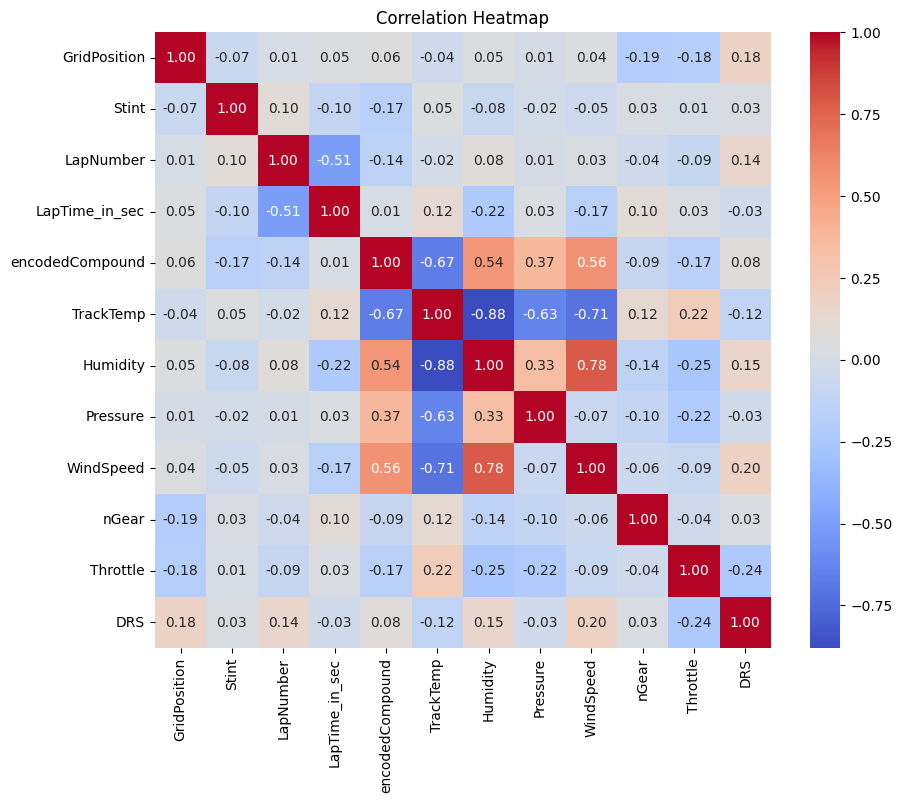

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gp_race['encodedCompound'] = label_encoder.fit_transform(gp_race['Compound'])
correlation_matrix = gp_race[['GridPosition', 'Stint', 'LapNumber',
       'LapTime_in_sec', 'encodedCompound', 'TrackTemp', 'Humidity', 'Pressure',
       'WindSpeed', 'nGear', 'Throttle', 'DRS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
gp_mexico_2024 = mexico_2024.groupby(['Driver','GridPosition',  'Year' ,'Stint' , 'EventName']).agg({
    'LapNumber': lambda x: len(np.unique(x)),
    'LapTime_in_sec' : 'mean',
    'Sector1Time_in_sec':'mean',
    'Sector2Time_in_sec':'mean',
    'Sector3Time_in_sec':'mean',
    'SpeedI1': 'mean',
    'SpeedI2': 'mean',
    'SpeedFL': 'mean',
    'SpeedST': 'mean',
    'Compound' : 'first',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'Pressure' : 'first',
    'WindDirection' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max'
}).reset_index()
gp_mexico_2024

,Driver,GridPosition,Year,Stint,EventName,LapNumber,LapTime_in_sec,Sector1Time_in_sec,Sector2Time_in_sec,Sector3Time_in_sec,...,SpeedST,Compound,TrackTemp,Humidity,Pressure,WindDirection,WindSpeed,nGear,Throttle,DRS
0,ALB,0.0,2024,1.0,Spanish Grand Prix,18,83.545944,24.373647,33.447722,25.117111,...,312.000000,MEDIUM,39.1,63.0,1001.8,244,2.7,8,100,14
1,ALB,0.0,2024,2.0,Spanish Grand Prix,25,82.342480,24.839800,32.739400,24.763280,...,301.823529,SOFT,39.1,63.0,1001.8,244,2.7,8,100,14
2,ALB,0.0,2024,3.0,Spanish Grand Prix,22,81.635773,24.716364,32.686409,24.233000,...,298.700000,SOFT,39.1,63.0,1001.8,244,2.7,8,100,14
3,ALB,5.0,2019,1.0,Mexico Grand Prix,14,85.147000,29.993769,32.648357,22.348429,...,312.583333,MEDIUM,43.4,48.4,781.5,98,1.5,8,100,14
4,ALB,5.0,2019,2.0,Mexico Grand Prix,30,81.891867,29.378533,31.402967,21.110367,...,322.555556,MEDIUM,43.4,48.4,781.5,98,1.5,8,100,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,ZHO,20.0,2024,2.0,Japanese Grand Prix,6,106.395800,42.197800,44.982500,22.873667,...,290.000000,SOFT,39.4,44.0,1012.5,179,2.1,8,104,14
1081,ZHO,20.0,2024,2.0,Saudi Arabian Grand Prix,8,98.389500,39.706500,29.220875,29.462125,...,303.375000,SOFT,33.6,67.0,1012.0,342,2.6,8,100,14
1082,ZHO,20.0,2024,3.0,Austrian Grand Prix,19,72.811632,19.044000,31.976737,21.790895,...,296.789474,HARD,46.2,36.0,932.9,272,1.8,8,100,14
1083,ZHO,20.0,2024,3.0,Japanese Grand Prix,4,103.544750,40.529250,43.416250,19.599250,...,289.750000,HARD,39.4,44.0,1012.5,179,2.1,8,104,14


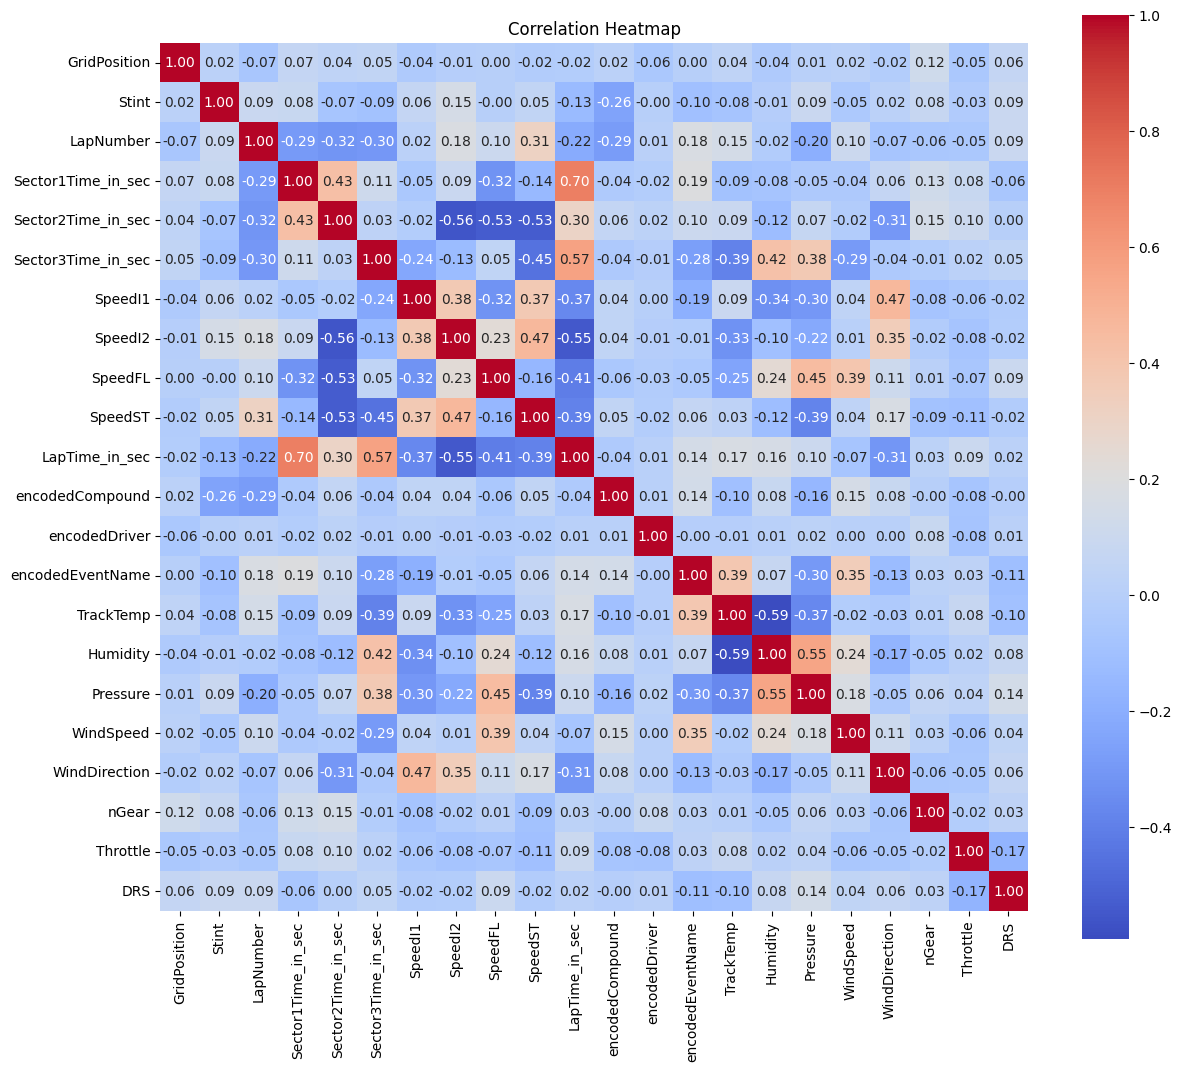

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gp_mexico_2024['encodedCompound'] = label_encoder.fit_transform(gp_mexico_2024['Compound'])
gp_mexico_2024['encodedDriver'] = label_encoder.fit_transform(gp_mexico_2024['Driver'])
gp_mexico_2024['encodedEventName'] = label_encoder.fit_transform(gp_mexico_2024['EventName'])

gp_mexico_2024.to_csv('gp_mexico_2024.csv', index=False)

correlation_matrix = gp_mexico_2024[['GridPosition', 'Stint', 'LapNumber','Sector1Time_in_sec', 'Sector2Time_in_sec',
       'Sector3Time_in_sec', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'LapTime_in_sec', 'encodedCompound','encodedDriver','encodedEventName', 'TrackTemp', 'Humidity', 'Pressure',
       'WindSpeed','WindDirection', 'nGear', 'Throttle', 'DRS']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# model (sectortime , speeds)

## correlations

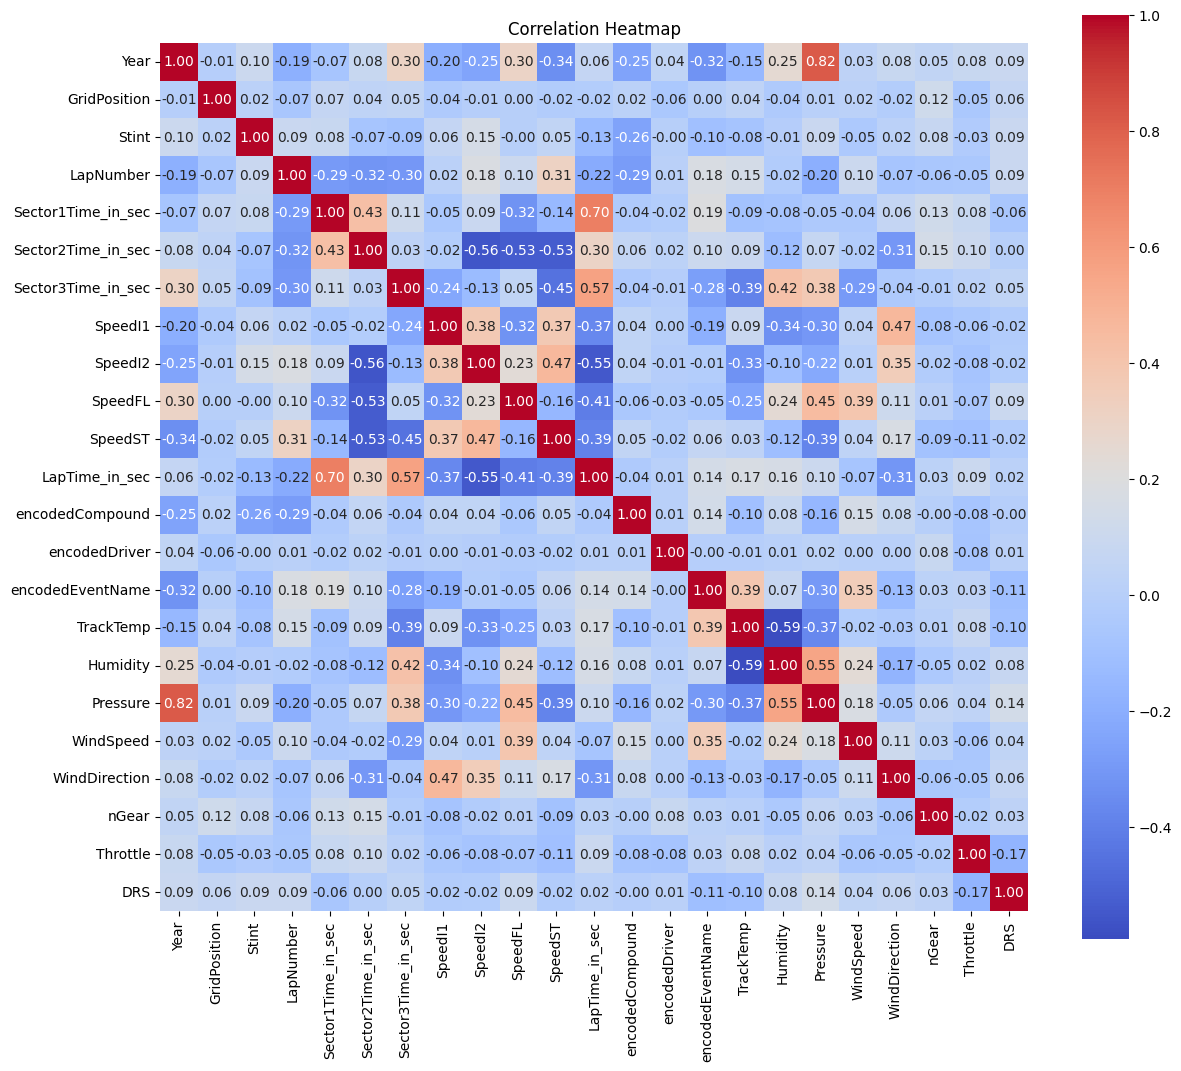

In [ ]:
from sklearn.preprocessing import LabelEncoder

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')

correlation_matrix = mexico_2024[['Year','GridPosition', 'Stint', 'LapNumber','Sector1Time_in_sec', 'Sector2Time_in_sec',
       'Sector3Time_in_sec', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'LapTime_in_sec', 'encodedCompound','encodedDriver','encodedEventName', 'TrackTemp', 'Humidity', 'Pressure',
       'WindSpeed','WindDirection', 'nGear', 'Throttle', 'DRS']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


### speeds

In [ ]:
corr = correlation_matrix['SpeedI1']
corr.sort_values(ascending=True)
# Humidity, Pressure , WindDirection ,Sector3Time_in_sec,  Year , encodedEventName , nGear , TrackTemp, Throttle, GridPosition, DRS, WindSpeed

,SpeedI1
LapTime_in_sec,-0.368425
Humidity,-0.336267
SpeedFL,-0.324790
Pressure,-0.301110
Sector3Time_in_sec,-0.237529
Year,-0.199406
encodedEventName,-0.194975
nGear,-0.078579
Throttle,-0.056014
Sector1Time_in_sec,-0.054475


In [ ]:
corr = correlation_matrix['SpeedFL']
corr.sort_values(ascending=True)
# TrackTemp , Pressure , WindSpeed , year, Humidity , WindDirection , SpeedI1

,SpeedFL
Sector2Time_in_sec,-0.532940
LapTime_in_sec,-0.408371
SpeedI1,-0.324790
Sector1Time_in_sec,-0.322526
TrackTemp,-0.246797
SpeedST,-0.156581
Throttle,-0.069371
encodedCompound,-0.057745
encodedEventName,-0.046882
encodedDriver,-0.026661


In [ ]:
corr = correlation_matrix['SpeedST']
corr.sort_values(ascending=True)
# Sector3Time_in_sec, Pressure , Year , Humidity , Throttle , WindDirection , encodedEventName ,  SpeedI1 , nGear , GridPosition , WindSpeed, TrackTemp

,SpeedST
Sector2Time_in_sec,-0.534200
Sector3Time_in_sec,-0.454139
LapTime_in_sec,-0.389099
Pressure,-0.386453
Year,-0.339658
SpeedFL,-0.156581
Sector1Time_in_sec,-0.142095
Humidity,-0.118803
Throttle,-0.105312
nGear,-0.089656


In [ ]:
corr = correlation_matrix['SpeedI2']
corr.sort_values(ascending=True)
# TrackTemp , Year , Pressure, Sector3Time_in_sec ,Humidity,  SpeedST, SpeedI1 , WindDirection

,SpeedI2
Sector2Time_in_sec,-0.560005
LapTime_in_sec,-0.545752
TrackTemp,-0.331054
Year,-0.249823
Pressure,-0.222566
Sector3Time_in_sec,-0.126747
Humidity,-0.102649
Throttle,-0.079210
nGear,-0.021710
DRS,-0.020287


###  sector times

In [ ]:
corr = correlation_matrix['Sector3Time_in_sec']
corr.sort_values(ascending=True)
# TrackTemp , WindSpeed , encodedEventName, SpeedI1 , Humidity , Pressure , Year , WindDirection , encodedDriver

,Sector3Time_in_sec
SpeedST,-0.454139
TrackTemp,-0.390382
LapNumber,-0.300896
WindSpeed,-0.293430
encodedEventName,-0.275344
SpeedI1,-0.237529
SpeedI2,-0.126747
Stint,-0.092505
WindDirection,-0.044660
encodedCompound,-0.044083


In [ ]:
corr = correlation_matrix['Sector1Time_in_sec']
corr.sort_values(ascending=True)
# TrackTemp, encodedEventName , nGear ,Humidity,Year , DRS , Sector3Time_in_sec , Pressure , WindSpeed , Throttle, GridPosition

,Sector1Time_in_sec
SpeedFL,-0.322526
LapNumber,-0.292171
SpeedST,-0.142095
TrackTemp,-0.091265
Humidity,-0.078078
Year,-0.070808
DRS,-0.064391
SpeedI1,-0.054475
Pressure,-0.045374
WindSpeed,-0.041062


In [ ]:
corr = correlation_matrix['Sector2Time_in_sec']
corr.sort_values(ascending=True)
# WindDirection , Humidity , WindSpeed, nGear , Throttle ,encodedEventName , TrackTemp, Pressure , DRS

,Sector2Time_in_sec
SpeedI2,-0.560005
SpeedST,-0.534200
SpeedFL,-0.532940
LapNumber,-0.318775
WindDirection,-0.306351
Humidity,-0.120836
Stint,-0.071660
WindSpeed,-0.022068
SpeedI1,-0.019948
DRS,0.000811


## modelling sector session times and Speeds

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score

standard_scaler = MinMaxScaler()

def normalization(columns_to_be_normalized, other_cols , df):
  y = df[other_cols]
  df = pd.DataFrame(standard_scaler.fit_transform(df[columns_to_be_normalized]), columns=columns_to_be_normalized, index=df.index)
  df[other_cols] = y
  return df , y


def test_train_split(df, X_cols , y_cols, type, predicted_values , cols):

  if type=='shuffle':
    test_data = df.sample(frac=0.2, random_state=42)
    train_data = df.drop(test_data.index)
  elif type=='specific_race':
    # test_data = df[(df['Year'] == 2023) & (df['EventName'] == 'Mexico Grand Prix')]
    test_data = df[((df['Year'] == 2023)) & (df['EventName'] == 'Mexico Grand Prix')]
    train_data = df.drop(test_data.index)

  X_train = train_data[X_cols]
  y_train = train_data[y_cols]
  X_test = test_data[X_cols]
  y_test = test_data[y_cols]
  for col in cols:
    if col in X_cols:
      # print('col is :', col)
      X_test[col] = predicted_values[col]
  # print(X_test.columns)
  return X_train, X_test, y_train, y_test


def find_params(model, df , target, X_cols):

  y = df[target]
  X = df[X_cols]

  if model == 'rf':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [ 5, 10, 15],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    }

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'svr':
    param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1]
    }
    svr = SVR(kernel='linear')
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'xgb':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.001, 0.01, 0.1 ],
      'min_child_weight': [1, 3, 5]
    }
    xgb = XGBRegressor()
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  return best_params


def model(model, df, x_cols, target , X_train, X_test, y_train, y_test, best_params , predicted_values ):
  if model== 'rf':
    best_model = RandomForestRegressor(
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split= best_params['min_samples_split'],
        n_estimators=best_params['n_estimators'],
        random_state=42
    )
  elif model== 'svr':
    best_model = SVR(
        kernel='linear',
        C= best_params['C'],
        epsilon= best_params['epsilon'],
        gamma= best_params['gamma'],
    )

  elif model== 'xgb':
    best_model = XGBRegressor(
        learning_rate =best_params['learning_rate'],
        max_depth = best_params['max_depth'],
        min_child_weight = best_params['min_child_weight'],
        n_estimators = best_params['n_estimators'],
     )
  y = df[target]
  X = df[x_cols]
  cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

  best_model.fit(X_train, y_train)

  if len(X_test)==len(predicted_values):
    print('replacing',target )
    for col1 in predicted_values.columns:
      if col1 in X_test.columns:
        X_test[col1] = predicted_values[col1]
  else:
    print('dimentions mismatch',target )


  y_pred = best_model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  # print(f"R2 score on test set {y_test.columns[0]}: {r2:.4f}")
  mse = mean_squared_error(y_test, y_pred)
  print(f"MSE score on test set {y_test.columns[0]}: {mse:.4f}")
  return y_pred , mse



#### rfr normalization

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],

}

cols = []
predicted_values = pd.DataFrame()

for target, features in imp_features.items():
  df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('rf', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('rf',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



dimentions mismatch Sector3Time_in_sec
MSE score on test set Sector3Time_in_sec: 4.8645
replacing Sector2Time_in_sec
MSE score on test set Sector2Time_in_sec: 13.4941
replacing Sector1Time_in_sec
MSE score on test set Sector1Time_in_sec: 183.9478


#### RFR withut normalizong


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_values = pd.read_csv('predicted_sector32time.csv')
imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
}

cols = []
predicted_values = pd.DataFrame()
df = mexico_2024
for target, features in imp_features.items():
  # df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('rf', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('rf',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



dimentions mismatch Sector3Time_in_sec
MSE score on test set Sector3Time_in_sec: 3.0096
replacing Sector2Time_in_sec
MSE score on test set Sector2Time_in_sec: 7.6311
replacing Sector1Time_in_sec
MSE score on test set Sector1Time_in_sec: 103.2037


### xgb

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
  }

cols = []
predicted_values = pd.DataFrame()

for target, features in imp_features.items():
  df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('xgb', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('xgb',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



dimentions mismatch Sector3Time_in_sec
MSE score on test set Sector3Time_in_sec: 4.3752
replacing Sector2Time_in_sec
MSE score on test set Sector2Time_in_sec: 16.0516
replacing Sector1Time_in_sec
MSE score on test set Sector1Time_in_sec: 9.3885


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
  }

cols = []
predicted_values = pd.DataFrame()
df = mexico_2024
for target, features in imp_features.items():
  # df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('xgb', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('xgb',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



dimentions mismatch Sector3Time_in_sec
MSE score on test set Sector3Time_in_sec: 4.3752
replacing Sector2Time_in_sec
MSE score on test set Sector2Time_in_sec: 16.0516
replacing Sector1Time_in_sec
MSE score on test set Sector1Time_in_sec: 13.7545


In [ ]:
xgb_predicted_values=predicted_values.copy()


In [ ]:
xgb_predicted_values=predicted_values['Sector2Time_in_sec']

In [ ]:
xgb_predicted_values.to_csv('predicted_sector32time.csv', index=False)
predicted_values

,Sector3Time_in_sec,Sector2Time_in_sec,Sector1Time_in_sec
0,22.615755,32.614017,31.985199
1,22.615755,32.614017,31.985199
2,22.618765,32.614017,31.980946
3,22.618765,32.614017,31.980946
4,22.618765,32.614017,31.980946
5,22.271532,32.299610,32.626423
6,22.271532,32.299610,32.626423
7,22.271532,32.299610,32.626423
8,23.100096,32.614017,33.274799
9,23.100096,32.614017,33.274799


### svr

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
    'SpeedST': ['Sector3Time_in_sec', 'Pressure'  , 'Humidity' , 'Throttle' , 'WindDirection' , 'encodedEventName' ,  'nGear' , 'GridPosition' , 'WindSpeed', 'TrackTemp' ],
    'SpeedI1': ['Humidity', 'Pressure' , 'WindDirection' ,'Sector3Time_in_sec' , 'encodedEventName' , 'nGear' , 'TrackTemp', 'Throttle', 'GridPosition', 'WindSpeed' ],
    'SpeedFL': ['TrackTemp' , 'Pressure' , 'WindSpeed' , 'Humidity' , 'WindDirection' , 'SpeedI1', 'Throttle' , 'Sector2Time_in_sec' ],
    'SpeedI2': ['TrackTemp' , 'Pressure', 'Sector3Time_in_sec' ,'Humidity',  'SpeedST', 'SpeedI1' , 'WindDirection'],
}

cols = []
predicted_values = pd.DataFrame()

for target, features in imp_features.items():
  df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('svr', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('svr',df, features, target, X_train, X_test, y_train, y_test, best_params)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



MSE score on test set Sector3Time_in_sec: 10.1587
MSE score on test set Sector2Time_in_sec: 38.1974


ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# model (stint , compound, lap)

## qualyfying + race mexico city

In [ ]:
# qualifying
q_data = pd.read_csv('gp_q.csv')
race_data = pd.read_csv('gp_race.csv')
print(race_data.columns)
print(q_data.columns)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

race_data['encodedCompound'] = label_encoder.fit_transform(race_data['Compound'])
race_data['encodedDriver'] = label_encoder.fit_transform(race_data['Driver'])

Index(['Driver', 'GridPosition', 'Year', 'Stint', 'LapNumber',
       'LapTime_in_sec', 'Compound', 'TrackTemp', 'Humidity', 'Pressure',
       'WindSpeed', 'nGear', 'Throttle', 'DRS'],
      dtype='object')
Index(['Driver', 'Year', 'Stint', 'LapNumber', 'LapTime_in_sec', 'Compound',
       'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed', 'nGear', 'Throttle',
       'DRS'],
      dtype='object')


In [ ]:
# race_data['TotalStint']=race_data.groupby(['Driver', 'Year'])['Stint'].transform('count')
# race_data
gp_race = race_data.groupby(['Driver', 'Year']).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max'
}).reset_index()
gp_race
gp_q= q_data.groupby(['Driver', 'Year']).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max'
}).reset_index()
gp_q

gp_race['type']= 0 # 0 indicates race data
gp_q['type']= 1    # 1 indicates qualifying data
combined_df = pd.concat([gp_race, gp_q], ignore_index=True)
combined_df['encodedDriver'] = label_encoder.fit_transform(combined_df['Driver'])
combined_df

,Driver,Year,Stint,TrackTemp,Humidity,Pressure,WindSpeed,nGear,Throttle,DRS
0,ALB,2019,5.0,32.2,61.4,781.8,1.0,8,104,14
1,ALB,2022,2.0,48.8,40.0,783.0,1.3,8,104,14
2,ALB,2023,4.0,47.3,28.0,780.7,1.1,8,104,14
3,ALO,2018,4.0,25.5,63.9,783.8,0.8,8,104,14
4,ALO,2021,2.0,46.9,21.7,784.0,0.4,8,104,14
...,...,...,...,...,...,...,...,...,...,...
95,VET,2019,5.0,32.2,61.4,781.8,1.0,8,104,14
96,VET,2021,5.0,46.9,21.7,784.0,0.4,8,104,14
97,VET,2022,2.0,48.8,40.0,783.0,1.3,8,104,14
98,ZHO,2022,4.0,48.8,40.0,783.0,1.3,8,104,14


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
columns_to_be_normalized = [ 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed',
                           'nGear', 'Throttle', 'DRS', 'encodedDriver', 'type']
y = combined_df['Stint']
combined_df = pd.DataFrame(standard_scaler.fit_transform(combined_df[columns_to_be_normalized]), columns=columns_to_be_normalized)
combined_df['Stint'] = y
print("Standard Normalized DataFrame (Scikit-Learn):")
combined_df

Standard Normalized DataFrame (Scikit-Learn):


,TrackTemp,Humidity,Pressure,WindSpeed,nGear,Throttle,DRS,encodedDriver,type,Stint
0,0.768240,0.632701,0.16,0.60,0.190476,0.2,1.0,0.00000,0.0,3.0
1,0.798283,0.457346,0.20,0.70,0.190476,0.2,1.0,0.00000,0.0,2.0
2,0.935622,0.220379,0.10,0.35,0.190476,0.2,1.0,0.00000,0.0,3.0
3,0.416309,0.763033,0.88,1.00,0.190476,0.2,0.0,0.03125,0.0,1.0
4,0.789700,0.353081,1.00,0.00,0.190476,0.2,1.0,0.03125,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
195,0.287554,0.940758,0.22,0.35,0.190476,1.0,1.0,0.96875,1.0,5.0
196,0.918455,0.000000,0.66,0.05,0.190476,1.0,1.0,0.96875,1.0,5.0
197,1.000000,0.433649,0.46,0.50,0.190476,1.0,1.0,0.96875,1.0,2.0
198,1.000000,0.433649,0.46,0.50,0.190476,1.0,1.0,1.00000,1.0,4.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


y = combined_df[['Stint']]
X = combined_df.drop(columns=['Stint' ])

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestRegressor()

# Create the RFE object
rfe = RFE(rf)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y['Stint'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y['Stint'], test_size=0.2, random_state=42)

# Create the Random Forest Regressor with the best parameters
best_rfr = RandomForestRegressor(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=1000,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rfr, X, y['Stint'], cv=5, scoring='neg_mean_squared_error')

# Print the results
print(f"Cross-validation scores: {-cv_scores}")


# Train the final model on the entire dataset
best_rfr.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rfr.predict(X_test)

# Calculate the R-squared score on the test set

mse = mean_squared_error(y_test, y_pred)
print(f"mse score on test set: {mse:.4f}")

# Print feature importances
feature_importance = best_rfr.feature_importances_
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Cross-validation scores: [0.57559602 0.42239292 0.97574452 2.61195448 2.5547255 ]
mse score on test set: 1.9117
TrackTemp: 0.0173
Humidity: 0.0377
Pressure: 0.0244
WindSpeed: 0.0168
nGear: 0.0000
Throttle: 0.0006
DRS: 0.0028
encodedDriver: 0.2372
type: 0.6632


In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

y = combined_df[['Stint']]
X = combined_df.drop(columns=['Stint' ])

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Create the XGBoost model
xgb = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
grid_search.fit(X, y['Stint'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y['Stint'], test_size=0.2, random_state=42)

# Create the Random Forest Regressor with the best parameters
best_xgb = XGBRegressor(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 200
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='neg_mean_squared_error')

# Print the results
print(f"Cross-validation scores: {-cv_scores}")


# Train the final model on the entire dataset
best_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate the R-squared score on the test set

mse = mean_squared_error(y_test, y_pred)
print(f"mse score on test set: {mse:.4f}")





Cross-validation scores: [0.45986723 0.52678017 1.0884369  2.3441517  2.43271342]
mse score on test set: 1.8700


In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

cv_scores = cross_val_score(linear_regression, X[['encodedDriver','type']], y['Stint'], cv=5, scoring='neg_mean_squared_error')

# Print the results
print(f"Cross-validation scores: {-cv_scores}")


# Train the final model on the entire dataset
linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

# Calculate the R-squared score on the test set

mse = mean_squared_error(y_test, y_pred)
print(f"mse score on test set: {mse:.4f}")



Cross-validation scores: [0.50079168 0.38980506 1.08408298 2.2240848  2.37621121]
mse score on test set: 1.9185


## 2024 races + mexico races

### Correlations

In [ ]:
corr = correlation_matrix['Stint']
corr.sort_values(ascending=True)
# encodedEventName , Sector3Time_in_sec , TrackTemp , WindSpeed , Sector2Time_in_sec, DRS, Pressure

,Stint
encodedCompound,-0.255054
LapTime_in_sec,-0.133948
encodedEventName,-0.102583
Sector3Time_in_sec,-0.092505
TrackTemp,-0.078806
Sector2Time_in_sec,-0.071660
WindSpeed,-0.049698
Throttle,-0.028036
Humidity,-0.013828
SpeedFL,-0.000489


In [ ]:
corr_with_compound = correlation_matrix['encodedCompound']
corr_with_compound.sort_values(ascending=True)
# Stint, Pressure , TrackTemp , Throttle , Sector3Time_in_sec , WindSpeed, encodedEventName , Humidity , WindDirection

,encodedCompound
LapNumber,-0.288121
Stint,-0.255054
Year,-0.251772
Pressure,-0.155061
TrackTemp,-0.104652
Throttle,-0.075142
SpeedFL,-0.057745
Sector3Time_in_sec,-0.044083
LapTime_in_sec,-0.037200
Sector1Time_in_sec,-0.037002


In [ ]:
corr_with_lapNumber = correlation_matrix['LapNumber']
corr_with_lapNumber.sort_values(ascending=True)
# Sector2Time_in_sec , Sector3Time_in_sec , encodedCompound , LapTime_in_sec , Pressure , WindDirection , GridPosition , encodedEventName , TrackTemp , WindSpeed

,LapNumber
Sector2Time_in_sec,-0.318775
Sector3Time_in_sec,-0.300896
Sector1Time_in_sec,-0.292171
encodedCompound,-0.288121
LapTime_in_sec,-0.218260
Pressure,-0.199534
Year,-0.190465
WindDirection,-0.071647
GridPosition,-0.069630
nGear,-0.058414


In [ ]:
corr_with_lapTime = correlation_matrix['LapTime_in_sec']
corr_with_lapTime.sort_values(ascending=True)
# SpeedI2 , SpeedFL , SpeedST , SpeedI1 , WindDirection , Stint ,WindSpeed,encodedCompound,   Sector1Time_in_sec , Sector2Time_in_sec , Sector3Time_in_sec ,TrackTemp , humidity, event , pressure

,LapTime_in_sec
SpeedI2,-0.545752
SpeedFL,-0.408371
SpeedST,-0.389099
SpeedI1,-0.368425
WindDirection,-0.309157
LapNumber,-0.218260
Stint,-0.133948
WindSpeed,-0.072634
encodedCompound,-0.037200
GridPosition,-0.018013


### Stint

Index(['Driver', 'GridPosition', 'Year', 'Stint', 'EventName', 'LapNumber',
       'LapTime_in_sec', 'Sector1Time_in_sec', 'Sector2Time_in_sec',
       'Sector3Time_in_sec', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'Compound', 'TrackTemp', 'Humidity', 'Pressure', 'WindDirection',
       'WindSpeed', 'nGear', 'Throttle', 'DRS', 'encodedCompound',
       'encodedDriver', 'encodedEventName'],
      dtype='object')


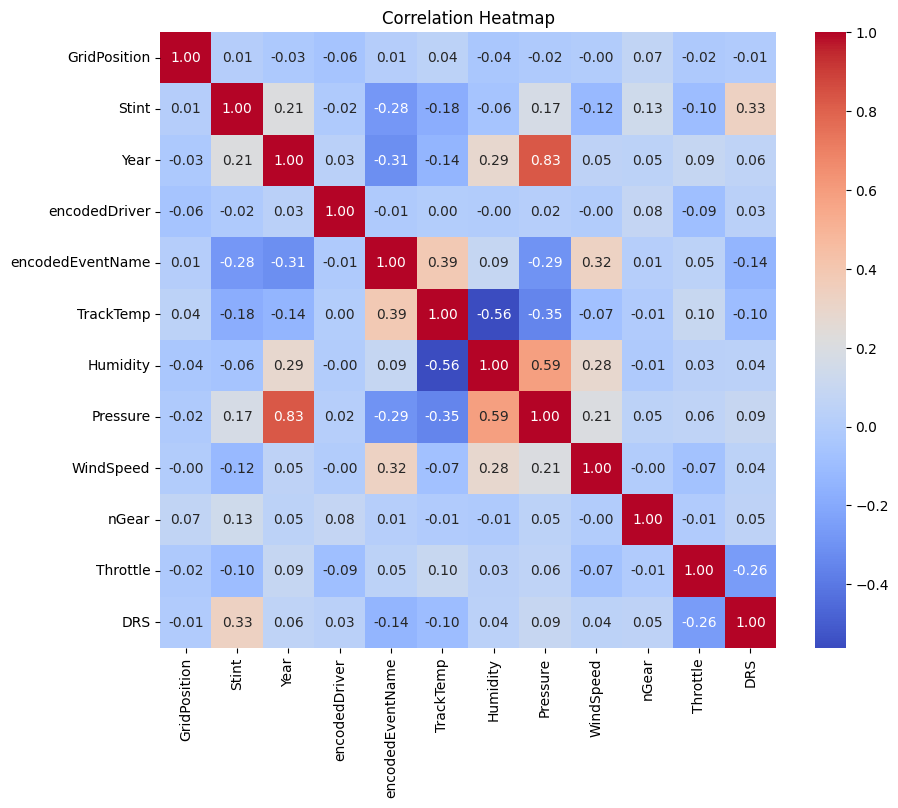

,encodedDriver,Driver,Year,encodedEventName,GridPosition,EventName,Stint,TrackTemp,Humidity,WindDirection,Pressure,WindSpeed,nGear,Throttle,DRS,Sector3Time_in_sec,Sector2Time_in_sec
0,0,ALB,2019,11,5.0,Mexico Grand Prix,3.0,43.4,48.4,98,781.5,1.5,8,100,14,21.388426,31.672947
1,0,ALB,2022,11,17.0,Mexico Grand Prix,2.0,44.1,41.0,229,781.7,1.7,8,100,14,22.080605,33.298669
2,0,ALB,2023,11,14.0,Mexico Grand Prix,3.0,47.3,31.0,278,781.2,1.0,8,100,14,31.157535,37.086193
3,0,ALB,2024,0,12.0,Australian Grand Prix,3.0,37.0,49.0,306,1021.6,0.4,8,100,14,37.356071,18.460043
4,0,ALB,2024,1,16.0,Austrian Grand Prix,3.0,46.2,36.0,272,932.9,1.8,8,100,14,21.943802,32.269922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,33,ZHO,2024,10,20.0,Japanese Grand Prix,4.0,39.4,44.0,179,1012.5,2.1,8,104,14,31.746979,56.379438
395,33,ZHO,2024,12,19.0,Miami Grand Prix,2.0,46.4,57.0,166,1017.0,3.3,8,100,14,26.700871,36.609297
396,33,ZHO,2024,13,18.0,Monaco Grand Prix,3.0,49.4,69.0,27,1019.1,1.1,8,104,14,21.852478,41.482019
397,33,ZHO,2024,14,20.0,Saudi Arabian Grand Prix,2.0,33.6,67.0,342,1012.0,2.6,8,100,14,30.508672,30.285486


In [6]:

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
print(mexico_2024.columns)


gp2_mexico_2024 = mexico_2024.groupby(['encodedDriver','Driver', 'Year', 'encodedEventName', 'GridPosition' , 'EventName',]).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'WindDirection' : 'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max',
    'Sector3Time_in_sec' : 'mean',
    'Sector2Time_in_sec' : 'mean',

}).reset_index()

correlation_matrix = gp2_mexico_2024[['GridPosition', 'Stint', 'Year'
      ,'encodedDriver','encodedEventName', 'TrackTemp', 'Humidity', 'Pressure',
       'WindSpeed', 'nGear', 'Throttle', 'DRS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

gp2_mexico_2024 # for Stints

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
y = gp2_mexico_2024[['Stint', 'EventName', 'Year', 'Driver']]

columns_to_be_normalized = [ 'encodedDriver', 'encodedEventName','TrackTemp', 'GridPosition', 'Throttle',
                             'Humidity', 'Pressure', 'WindSpeed', 'WindDirection','nGear','DRS', ]
gp2_mexico_2024 = pd.DataFrame(standard_scaler.fit_transform(gp2_mexico_2024[columns_to_be_normalized]), columns=columns_to_be_normalized)
gp2_mexico_2024[['Stint', 'EventName', 'Year', 'Driver']] = y


In [ ]:
gp2_mexico_2024.shape

(399, 16)

In [ ]:
gp2_mexico_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   encodedDriver     399 non-null    float64
 1   encodedEventName  399 non-null    float64
 2   TrackTemp         399 non-null    float64
 3   GridPosition      399 non-null    float64
 4   Throttle          399 non-null    float64
 5   Humidity          399 non-null    float64
 6   Pressure          399 non-null    float64
 7   WindSpeed         399 non-null    float64
 8   WindDirection     399 non-null    float64
 9   nGear             399 non-null    float64
 10  DRS               399 non-null    float64
 11  Stint             399 non-null    float64
 12  EventName         399 non-null    object 
 13  Year              399 non-null    int64  
 14  Driver            399 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 46.9+ KB


In [ ]:
gp2_mexico_2024.dropna(inplace=True)
gp2_mexico_2024.info()


<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 398
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encodedDriver       390 non-null    float64
 1   Year                390 non-null    float64
 2   encodedEventName    390 non-null    float64
 3   TrackTemp           390 non-null    float64
 4   GridPosition        390 non-null    float64
 5   Sector3Time_in_sec  390 non-null    float64
 6   Sector2Time_in_sec  390 non-null    float64
 7   Humidity            390 non-null    float64
 8   Pressure            390 non-null    float64
 9   WindSpeed           390 non-null    float64
 10  WindDirection       390 non-null    float64
 11  nGear               390 non-null    float64
 12  Throttle            390 non-null    float64
 13  DRS                 390 non-null    float64
 14  Stint               390 non-null    float64
 15  EventName           390 non-null    object 
dtypes: float64(15

#### xgb

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

y = mexico_2024[['Stint']]
X = mexico_2024.drop(columns=['Stint' ])

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Create the XGBoost model
xgb = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
grid_search.fit(X, y['Stint'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500}


In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                     ]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)



y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                      ]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                      ]]

best_xgb = XGBClassifier(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 500,
   C= 100,
   gamma= 0.1,
   kerne= 'rbf'
)
y['Stint']=y['Stint']-1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")

# X_test =X_test.reset_index()
# test_data =test_data.reset_index()
# X_test['pred_Stint'] = y_pred
# X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

# X_test.to_csv('predicted_stint.csv', index=False)



Cross-validation scores: [0.6125     0.625      0.8        0.7        0.67088608]
accuracy_score on test set: 0.6000


In [ ]:
y_pred

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2])

In [1]:
len([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2])

20

#### rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestRegressor()

# Create the RFE object
rfe = RFE(rf)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y['Stint'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'	]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)

train_data = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS','Stint'	]]
test_data = test_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS','Stint'	]]

y_train = train_data['Stint']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'	]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'	]]


best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=1000,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['Stint'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy_score on test set: {accuracy_score:.4f}")


feature_importance = best_rfr.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})


Cross-validation scores: [0.625      0.4        0.3625     0.3875     0.41772152]
accuracy_score on test set: 0.1000
encodedEventName: 0.2310
WindDirection: 0.1272
Pressure: 0.1105
WindSpeed: 0.0918
Humidity: 0.0869
GridPosition: 0.0836
DRS: 0.0801
TrackTemp: 0.0768
encodedDriver: 0.0540
nGear: 0.0414
Throttle: 0.0168


In [ ]:
len(y_pred)

20

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'	]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=1000,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['Stint'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)
# y_pred.to_csv('predicted_stint.csv', index=False)

mse = mean_squared_error(y_test, y_pred)
print(f"mse score on test set: {mse:.4f}")
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f"accuracy score on test set: {accuracy:.4f}")

feature_importance = best_rfr.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

for index, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Cross-validation scores: [0.625      0.4        0.3625     0.3875     0.41772152]
mse score on test set: 0.4625
accuracy score on test set: 0.6500
encodedEventName: 0.2005
WindDirection: 0.1579
Humidity: 0.1003
Pressure: 0.0991
WindSpeed: 0.0978
GridPosition: 0.0865
TrackTemp: 0.0829
DRS: 0.0715
encodedDriver: 0.0463
nGear: 0.0397
Throttle: 0.0175


In [ ]:
y_pred

array([2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 3., 2., 2., 2., 3., 3., 2.,
       3., 3., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 3., 4., 2., 3., 3.,
       3., 3., 3., 2., 2., 4., 3., 2., 2., 3., 2., 2., 2., 2., 3., 3., 3.,
       3., 2., 3., 3., 2., 3., 3., 2., 3., 2., 3., 2., 3., 2., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.])

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'
                     ]]
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    # 'epsilon': [0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1]
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y['Stint'])

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                     ]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)

y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                      ]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                      ]]

best_svc = XGBClassifier(
    C= best_params['C'],
    kernel= best_params['kernel'],
    gamma= best_params['gamma']
)
y['Stint'] = y['Stint'] - 1
cv_scores = cross_val_score(best_svc, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
y_train =y_train-1
best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Stint'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('predicted_stint.csv', index=False)



Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation scores: [0.55       0.7        0.7375     0.65       0.62025316]
accuracy_score on test set: 0.7000


### Compound

In [ ]:
mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              1085 non-null   object 
 1   GridPosition        1085 non-null   float64
 2   Year                1085 non-null   int64  
 3   Stint               1085 non-null   float64
 4   EventName           1085 non-null   object 
 5   LapNumber           1085 non-null   int64  
 6   LapTime_in_sec      1073 non-null   float64
 7   Sector1Time_in_sec  1033 non-null   float64
 8   Sector2Time_in_sec  1076 non-null   float64
 9   Sector3Time_in_sec  1060 non-null   float64
 10  SpeedI1             1076 non-null   float64
 11  SpeedI2             1076 non-null   float64
 12  SpeedFL             1029 non-null   float64
 13  SpeedST             1076 non-null   float64
 14  Compound            1085 non-null   object 
 15  TrackTemp           1085 non-null   float64
 16  Humidi

In [ ]:

mexico_2024.dropna(inplace=True)
print(mexico_2024.info())
print (mexico_2024.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1083
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              1028 non-null   object 
 1   GridPosition        1028 non-null   float64
 2   Year                1028 non-null   int64  
 3   Stint               1028 non-null   float64
 4   EventName           1028 non-null   object 
 5   LapNumber           1028 non-null   int64  
 6   LapTime_in_sec      1028 non-null   float64
 7   Sector1Time_in_sec  1028 non-null   float64
 8   Sector2Time_in_sec  1028 non-null   float64
 9   Sector3Time_in_sec  1028 non-null   float64
 10  SpeedI1             1028 non-null   float64
 11  SpeedI2             1028 non-null   float64
 12  SpeedFL             1028 non-null   float64
 13  SpeedST             1028 non-null   float64
 14  Compound            1028 non-null   object 
 15  TrackTemp           1028 non-null   float64
 16  Humidity   

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
y = mexico_2024[['encodedCompound', 'EventName', 'Year', 'Driver']]

columns_to_be_normalized = [ 'encodedDriver', 'encodedEventName','TrackTemp', 'GridPosition', 'Sector2Time_in_sec', 'Sector3Time_in_sec','Sector1Time_in_sec',
                             'Humidity', 'Pressure', 'WindSpeed','WindDirection', 'nGear', 'Throttle', 'DRS', 'Stint']
mexico_2024 = pd.DataFrame(standard_scaler.fit_transform(mexico_2024[columns_to_be_normalized]), columns=columns_to_be_normalized, index=mexico_2024.index)
mexico_2024[['encodedCompound', 'EventName', 'Year', 'Driver']] = y
mexico_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1083
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encodedDriver       1028 non-null   float64
 1   encodedEventName    1028 non-null   float64
 2   TrackTemp           1028 non-null   float64
 3   GridPosition        1028 non-null   float64
 4   Sector2Time_in_sec  1028 non-null   float64
 5   Sector3Time_in_sec  1028 non-null   float64
 6   Sector1Time_in_sec  1028 non-null   float64
 7   Humidity            1028 non-null   float64
 8   Pressure            1028 non-null   float64
 9   WindSpeed           1028 non-null   float64
 10  WindDirection       1028 non-null   float64
 11  nGear               1028 non-null   float64
 12  Throttle            1028 non-null   float64
 13  DRS                 1028 non-null   float64
 14  Stint               1028 non-null   float64
 15  encodedCompound     1028 non-null   int64  
 16  EventName  

#### rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

mexico_2024 = mexico_2024.dropna(subset=['encodedCompound'])

y = mexico_2024[['encodedCompound']]
X = mexico_2024.drop(columns=['encodedCompound' ])

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor()

rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y['encodedCompound'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]

else:
  y_test = test_data['encodedCompound']
  X_test = test_data[['Year','EventName','Driver', 'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                      ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]

  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred_rounded
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)


Cross-validation accuracy scores: [0.69417476 0.70873786 0.71359223 0.72195122 0.70731707]
accuracy score on test set: 0.8235


#### xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

mexico_2024 = mexico_2024.dropna(subset=['encodedCompound'])
y = mexico_2024[['encodedCompound']]

X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

xgb = XGBClassifier()

# rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stints': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]

else:
  y_test = test_data['encodedCompound']
  X_test = test_data[['Year','EventName','Driver', 'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                      ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]

  print(len(X_test))
  print(len(predicted_sector32time))


best_xgb = XGBClassifier(
   max_depth= 10,
   min_samples_leaf= 1,
   min_samples_split= 2,
   n_estimators= 500
    # C= 1,
    # kernel='linear',
    # gamma=  0.001
)

cv_scores = cross_val_score(best_xgb, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")
X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)


Cross-validation accuracy scores: [0.63592233 0.76699029 0.75242718 0.78536585 0.67317073]
accuracy score on test set: 0.7627


In [ ]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

#### SVM

In [ ]:
train_data

,encodedDriver,encodedEventName,TrackTemp,GridPosition,Throttle,Humidity,Pressure,WindSpeed,WindDirection,nGear,DRS,Stint,EventName,Year,Driver
0,0.0,0.733333,0.787986,0.25,0.2,0.370213,0.001248,0.266667,0.225397,0.0625,0.928571,3.0,Mexico Grand Prix,2019,ALB
1,0.0,0.733333,0.812721,0.85,0.2,0.212766,0.002080,0.311111,0.641270,0.0625,0.928571,2.0,Mexico Grand Prix,2022,ALB
3,0.0,0.000000,0.561837,0.60,0.2,0.382979,1.000000,0.022222,0.885714,0.0625,0.928571,3.0,Australian Grand Prix,2024,ALB
4,0.0,0.066667,0.886926,0.80,0.2,0.106383,0.631032,0.333333,0.777778,0.0625,0.928571,3.0,Austrian Grand Prix,2024,ALB
5,0.0,0.133333,0.190813,0.65,0.2,0.319149,0.981281,0.133333,0.428571,0.0625,0.928571,3.0,Bahrain Grand Prix,2024,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.0,0.666667,0.646643,1.00,1.0,0.276596,0.962146,0.400000,0.482540,0.0625,0.928571,4.0,Japanese Grand Prix,2024,ZHO
395,1.0,0.800000,0.893993,0.95,0.2,0.553191,0.980865,0.666667,0.441270,0.0625,0.928571,2.0,Miami Grand Prix,2024,ZHO
396,1.0,0.866667,1.000000,0.90,1.0,0.808511,0.989601,0.177778,0.000000,0.0625,0.928571,3.0,Monaco Grand Prix,2024,ZHO
397,1.0,0.933333,0.441696,1.00,0.2,0.765957,0.960067,0.511111,1.000000,0.0625,0.928571,2.0,Saudi Arabian Grand Prix,2024,ZHO


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# y = mexico_2024[['encodedCompound']]
# X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
#                  ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     # 'epsilon': [0.01, 0.1, 0.5],
#     'gamma': [0.001, 0.01, 0.1]
# }
# svc = SVC()
# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# print(f"Best hyperparameters: {best_params}")

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt


mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]



test_data = mexico_2024[((mexico_2024['Year'] == 2023)) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stints': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]
  print('x_test dimension',X_test.shape)
else:
  print(len(X_test))
  print(len(predicted_sector32time))


best_svc = SVC(
    C= 1,
    kernel='rbf',
    gamma=  0.1
)
cv_scores = cross_val_score(best_svc, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")



x_test dimension (51, 15)
Cross-validation scores: [0.36893204 0.37378641 0.4368932  0.37560976 0.35609756]
accuracy_score on test set: 0.8235


In [ ]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3])

### Average Lap-Time

In [ ]:
mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
print (mexico_2024.shape)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
y = mexico_2024[['LapTime_in_sec', 'EventName', 'Year', 'Driver']]

columns_to_be_normalized = [ 'encodedDriver', 'encodedEventName','TrackTemp', 'GridPosition', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                             'Humidity', 'Pressure', 'WindSpeed','WindDirection', 'nGear', 'Throttle', 'DRS', 'Stint' , 'encodedCompound']
mexico_2024 = pd.DataFrame(standard_scaler.fit_transform(mexico_2024[columns_to_be_normalized]), columns=columns_to_be_normalized, index=mexico_2024.index)
mexico_2024[['LapTime_in_sec', 'EventName', 'Year', 'Driver']] = y
# mexico_2024.info()

(1028, 26)


#### xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators' :[100 , 200,  500]
}

xgb = XGBRegressor()

# rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
   max_depth= 5,
   min_samples_leaf= 1,
   min_samples_split= 2,
   n_estimators= 500
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")





Cross-validation MSE scores: [3.84036698 3.43070617 1.60192245 1.02867447 4.11006068]
MSE score on test set: 2.4228


new params

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")


X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['LapTime_in_sec'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_LapTime_in_sec.csv', index=False)


Cross-validation MSE scores: [3.02127283 2.53466101 1.24585892 0.93771299 3.75053471]
MSE score on test set: 2.4089


#### rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

mexico_2024 = mexico_2024.dropna(subset=['LapTime_in_sec'])

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024.drop(columns=['LapTime_in_sec' ])

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor()

rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y['LapTime_in_sec'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")


# X_test =X_test.reset_index()
# test_data =test_data.reset_index()
# X_test['LapTime_in_sec'] = y_pred
# X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

# X_test.to_csv('pred_LapTime_in_sec.csv', index=False)



Cross-validation MSE scores: [2.93043564 2.34767154 1.45211941 1.22731235 4.75973872]
MSE score on test set: 4.6621



*   withoout sector times minmaxscalar-normalizing: 68.20
*   withoout compound : 100.1211
*   without normalizing(without sector-times) : 132
*   without normalizing(with all sectors) : 5.21
*   after normalization-minmaxscalar(with all sectors) : 1295




In [ ]:
corr_with_lapTime = correlation_matrix['LapTime_in_sec']
corr_with_lapTime.sort_values(ascending=True)
# SpeedI2 , SpeedFL , SpeedST , SpeedI1 , WindDirection , Stint ,WindSpeed,encodedCompound,   Sector1Time_in_sec , Sector2Time_in_sec , Sector3Time_in_sec ,TrackTemp , humidity, event , pressure

,LapTime_in_sec
SpeedI2,-0.545752
SpeedFL,-0.408371
SpeedST,-0.389099
SpeedI1,-0.368425
WindDirection,-0.309157
LapNumber,-0.218260
Stint,-0.133948
WindSpeed,-0.072634
encodedCompound,-0.037200
GridPosition,-0.018013


#### SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# y = mexico_2024[['LapTime_in_sec']]
# X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
#                       'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
#                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
#                        ,  'Stint'	, 'encodedCompound']]

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     'epsilon': [0.01, 0.1, 0.5],
#     'gamma': [0.001, 0.01, 0.1]
# }
# svc = SVR()
# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# print(f"Best hyperparameters: {best_params}")

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]



test_data = mexico_2024[((mexico_2024['Year'] == 2023)) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]

temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stints': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:


  print(len(X_test))
  print(len(predicted_sector32time))


best_svc = SVR(
    C= 0.1,
    kernel=  0.5,
    epsilon= 0.001,
    gamma= 'linear'
)
y=y-1
cv_scores = cross_val_score(best_svc, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation scores: {-cv_scores}")
y_train=y_train-1

best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)
y_pred=y_pred+1
mean_squared_error = mean_squared_error(y_test, y_pred)

print(f"mean_squared_error on test set: {mean_squared_error:.4f}")




Best hyperparameters: {'C': 0.1, 'epsilon': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
Cross-validation scores: [0.48926279 5.37217463 0.95356296 1.43544879 0.64799476]
mean_squared_error on test set: 3.0170


### LapNumber

In [ ]:

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
print (mexico_2024.shape)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
y = mexico_2024[['LapNumber', 'EventName', 'Year', 'Driver']]

columns_to_be_normalized = [ 'encodedDriver', 'encodedEventName','TrackTemp', 'GridPosition', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                             'Humidity', 'Pressure', 'WindSpeed','WindDirection', 'nGear', 'Throttle', 'DRS', 'Stint' , 'encodedCompound', 'LapTime_in_sec' ]
mexico_2024 = pd.DataFrame(standard_scaler.fit_transform(mexico_2024[columns_to_be_normalized]), columns=columns_to_be_normalized, index=mexico_2024.index)
mexico_2024[['LapNumber', 'EventName', 'Year', 'Driver']] = y
mexico_2024.info()

(1028, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1083
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encodedDriver       1028 non-null   float64
 1   encodedEventName    1028 non-null   float64
 2   TrackTemp           1028 non-null   float64
 3   GridPosition        1028 non-null   float64
 4   Sector3Time_in_sec  1028 non-null   float64
 5   Sector2Time_in_sec  1028 non-null   float64
 6   Sector1Time_in_sec  1028 non-null   float64
 7   Humidity            1028 non-null   float64
 8   Pressure            1028 non-null   float64
 9   WindSpeed           1028 non-null   float64
 10  WindDirection       1028 non-null   float64
 11  nGear               1028 non-null   float64
 12  Throttle            1028 non-null   float64
 13  DRS                 1028 non-null   float64
 14  Stint               1028 non-null   float64
 15  encodedCompound     1028 non-null   float64
 16  

#### rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

mexico_2024 = mexico_2024.dropna(subset=['LapNumber'])

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                  'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                  # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                  'Stint', 'encodedCompound', 'LapTime_in_sec' ]]

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor()

rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y['LapNumber'])

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  # test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [64.81625082 59.73939095 39.60828397 41.60091772 86.01422533]
MSE score on test set: 87.9213



*   after normalization(without sectortimes) = 60.34
*   without normalizing(without sector-times) : 116
*   without normalizing(with all sectors) : 102.7
*   after normalization(with all sectors) : 432


new params

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  # test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 80.3144


#### xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec']]
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators' :[100 , 200,  500]
}
xgb = XGBRegressor()

# rfe = RFE(rf)
# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec' ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec' ]]

temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  # test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec' ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]

else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
    learning_rate= 0.1,
    max_depth= 5,
    min_child_weight= 5,
    n_estimators= 100
)

cv_scores = cross_val_score(best_xgb, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [62.35517616 56.07027669 39.75775935 47.1023616  74.11965767]
MSE score on test set: 107.3121


#### SVM

In [5]:

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt
mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')


y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


test_data = mexico_2024[((mexico_2024['Year'] == 2023)) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stints': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      # ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]


else:

  print(len(X_test))
  print(len(predicted_sector32time))


best_svc = SVR(
    C= 100,
    kernel= 'rbf',
    epsilon= 0.5,
    gamma=0.1
)
cv_scores = cross_val_score(best_svc, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation scores: {-cv_scores}")
best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)
mean_squared_error = mean_squared_error(y_test, y_pred)

print(f"mean_squared_error on test set: {mean_squared_error:.4f}")

# X_test =X_test.reset_index()
# test_data =test_data.reset_index()
# X_test['pred_Stint'] = y_pred
# X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

# X_test.to_csv('predicted_stint.csv', index=False)



Cross-validation scores: [171.34258869 147.24932474 127.19217298 156.75709082 148.07181069]
mean_squared_error on test set: 48.5515


# pickling 1

## sector times models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
import pickle

standard_scaler = MinMaxScaler()

def normalization(columns_to_be_normalized, other_cols , df):
  y = df[other_cols]
  df = pd.DataFrame(standard_scaler.fit_transform(df[columns_to_be_normalized]), columns=columns_to_be_normalized, index=df.index)
  df[other_cols] = y
  return df , y


def test_train_split(df, X_cols , y_cols, type, predicted_values , cols):

  if type=='shuffle':
    test_data = df.sample(frac=0.2, random_state=42)
    train_data = df.drop(test_data.index)
  elif type=='specific_race':
    test_data = df[(df['Year'] == 2023) & (df['EventName'] == 'Mexico Grand Prix')]
    # test_data = df[((df['Year'] == 2022)) & (df['EventName'] == 'Mexico Grand Prix')]
    train_data = df.drop(test_data.index)

  X_train = train_data[X_cols]
  y_train = train_data[y_cols]
  X_test = test_data[X_cols]
  y_test = test_data[y_cols]
  for col in cols:
    if col in X_cols:
      # print('col is :', col)
      X_test[col] = predicted_values[col]
  # print(X_test.columns)
  return X_train, X_test, y_train, y_test


def find_params(model, df , target, X_cols):

  y = df[target]
  X = df[X_cols]

  if model == 'rf':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [ 5, 10, 15],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    }

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'svr':
    param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1]
    }
    svr = SVR(kernel='linear')
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'xgb':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.001, 0.01, 0.1 ],
      'min_child_weight': [1, 3, 5]
    }
    xgb = XGBRegressor()
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
  return best_params


def model(model, df, x_cols, target , X_train, X_test, y_train, y_test, best_params , predicted_values ):
  if model== 'rf':
    best_model = RandomForestRegressor(
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split= best_params['min_samples_split'],
        n_estimators=best_params['n_estimators'],
        random_state=42
    )
  elif model== 'svr':
    best_model = SVR(
        kernel='linear',
        C= best_params['C'],
        epsilon= best_params['epsilon'],
        gamma= best_params['gamma'],
    )

  elif model== 'xgb':
    best_model = XGBRegressor(
        learning_rate =best_params['learning_rate'],
        max_depth = best_params['max_depth'],
        min_child_weight = best_params['min_child_weight'],
        n_estimators = best_params['n_estimators'],
     )
  y = df[target]
  X = df[x_cols]
  cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
  print('5fold cv scores:', -cv_scores)
  best_model.fit(X_train, y_train)


  if len(X_test)==len(predicted_values):
    for col1 in predicted_values.columns:
      if col1 in X_test.columns:
        X_test[col1] = predicted_values[col1]
        print('replacing predicted',col1 , 'with real one in test data' )

  y_pred = best_model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"MSE score on test set {y_test.columns[0]}: {mse:.4f}")

  with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/{target}.pkl', 'wb') as file:
    pickle.dump(best_model, file)

  return y_pred , mse



from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
}

cols = []
predicted_values = pd.DataFrame()
df=mexico_2024
for target, features in imp_features.items():
  # df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('xgb', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('xgb',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



5fold cv scores: [1.74199493 3.11733152 1.77398948 1.36565913 3.20538149]
MSE score on test set Sector3Time_in_sec: 4.3752
5fold cv scores: [1.9006305  2.34186266 1.47021787 2.05704439 1.89861622]
MSE score on test set Sector2Time_in_sec: 16.0516
5fold cv scores: [2.02941571 0.88976266 1.88530097 1.36676266 1.15259008]
replacing predicted Sector3Time_in_sec with real one in test data
MSE score on test set Sector1Time_in_sec: 13.7545


In [ ]:
predicted_values.to_csv('predicted_sector32time_2022.csv', index=False)


## Stint , Laps and Compound models

### Stint

In [ ]:
import pickle

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
print(mexico_2024.columns)


gp2_mexico_2024 = mexico_2024.groupby(['encodedDriver','Driver', 'Year', 'encodedEventName', 'GridPosition' , 'EventName',]).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'WindDirection' : 'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max',
    'Sector3Time_in_sec' : 'mean',
    'Sector2Time_in_sec' : 'mean',

}).reset_index()

Index(['Driver', 'GridPosition', 'Year', 'Stint', 'EventName', 'LapNumber',
       'LapTime_in_sec', 'Sector1Time_in_sec', 'Sector2Time_in_sec',
       'Sector3Time_in_sec', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'Compound', 'TrackTemp', 'Humidity', 'Pressure', 'WindDirection',
       'WindSpeed', 'nGear', 'Throttle', 'DRS', 'encodedCompound',
       'encodedDriver', 'encodedEventName'],
      dtype='object')


2023 AS TEST

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                     ]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)

y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
    C= 100,
    kernel= 'rbf',
    gamma= 0.1
)
y['Stint'] = y['Stint'] - 1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Stint'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('predicted_stint.csv', index=False)

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/Stint.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation scores: [0.55       0.7        0.7375     0.65       0.62025316]
accuracy_score on test set: 0.7000


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2022)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)



y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 500
)
y['Stint']=y['Stint']-1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")




Cross-validation scores: [0.6        0.625      0.8        0.7125     0.67088608]
accuracy_score on test set: 0.6500


### Compound

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]
temp = test_data.copy()



if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]

else:
  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/Compound.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)


Cross-validation accuracy scores: [0.69417476 0.70873786 0.71359223 0.72195122 0.70731707]
accuracy score on test set: 0.8475


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec',  	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec' ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]

else:

  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred_rounded
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)



Cross-validation accuracy scores: [0.69417476 0.71359223 0.71359223 0.73658537 0.70731707]
accuracy score on test set: 0.6000


### Average Lap Time

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_LapTime_in_sec'] = y_pred_rounded
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_LapTime_in_sec.csv', index=False)


with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/AverageLapTime.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation MSE scores: [3.02127283 2.53466101 1.24585892 0.93771299 3.75053471]
MSE score on test set: 2.5289


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec' ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")





Cross-validation MSE scores: [3.86142305 2.00970572 2.11251777 2.65882998 3.00762126]
MSE score on test set: 1.6783


### LapNumber

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/LapNumber.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 87.3224


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 104.0663


# pickling 2

## sector times models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
import pickle

standard_scaler = MinMaxScaler()

def normalization(columns_to_be_normalized, other_cols , df):
  y = df[other_cols]
  df = pd.DataFrame(standard_scaler.fit_transform(df[columns_to_be_normalized]), columns=columns_to_be_normalized, index=df.index)
  df[other_cols] = y
  return df , y


def test_train_split(df, X_cols , y_cols, type, predicted_values , cols):

  if type=='shuffle':
    test_data = df.sample(frac=0.2, random_state=42)
    train_data = df.drop(test_data.index)
  elif type=='specific_race':
    test_data = df[(df['Year'] == 2023) & (df['EventName'] == 'Mexico Grand Prix')]
    # test_data = df[((df['Year'] == 2022)) & (df['EventName'] == 'Mexico Grand Prix')]
    train_data = df.drop(test_data.index)

  X_train = train_data[X_cols]
  y_train = train_data[y_cols]
  X_test = test_data[X_cols]
  y_test = test_data[y_cols]
  for col in cols:
    if col in X_cols:
      # print('col is :', col)
      X_test[col] = predicted_values[col]
  # print(X_test.columns)
  return X_train, X_test, y_train, y_test


def find_params(model, df , target, X_cols):

  y = df[target]
  X = df[X_cols]

  if model == 'rf':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [ 5, 10, 15],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    }

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'svr':
    param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1]
    }
    svr = SVR(kernel='linear')
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'xgb':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.001, 0.01, 0.1 ],
      'min_child_weight': [1, 3, 5]
    }
    xgb = XGBRegressor()
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
  return best_params


def model(model, df, x_cols, target , X_train, X_test, y_train, y_test, best_params , predicted_values ):
  if model== 'rf':
    best_model = RandomForestRegressor(
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split= best_params['min_samples_split'],
        n_estimators=best_params['n_estimators'],
        random_state=42
    )
  elif model== 'svr':
    best_model = SVR(
        kernel='linear',
        C= best_params['C'],
        epsilon= best_params['epsilon'],
        gamma= best_params['gamma'],
    )

  elif model== 'xgb':
    best_model = XGBRegressor(
        learning_rate =best_params['learning_rate'],
        max_depth = best_params['max_depth'],
        min_child_weight = best_params['min_child_weight'],
        n_estimators = best_params['n_estimators'],
     )
  y = df[target]
  X = df[x_cols]
  cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
  print('5fold cv scores:', -cv_scores)
  best_model.fit(X_train, y_train)


  if len(X_test)==len(predicted_values):
    for col1 in predicted_values.columns:
      if col1 in X_test.columns:
        X_test[col1] = predicted_values[col1]
        print('replacing predicted',col1 , 'with real one in test data' )

  y_pred = best_model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"MSE score on test set {y_test.columns[0]}: {mse:.4f}")

  with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/{target}.pkl', 'wb') as file:
    pickle.dump(best_model, file)

  return y_pred , mse



from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
}

cols = []
predicted_values = pd.DataFrame()
df=mexico_2024
for target, features in imp_features.items():
  # df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('xgb', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('xgb',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



5fold cv scores: [1.74199493 3.11733152 1.77398948 1.36565913 3.20538149]
MSE score on test set Sector3Time_in_sec: 4.3752
5fold cv scores: [1.9006305  2.34186266 1.47021787 2.05704439 1.89861622]
MSE score on test set Sector2Time_in_sec: 16.0516
5fold cv scores: [2.02941571 0.88976266 1.88530097 1.36676266 1.15259008]
replacing predicted Sector3Time_in_sec with real one in test data
MSE score on test set Sector1Time_in_sec: 13.7545


In [ ]:
predicted_values.to_csv('predicted_sector32time_2022.csv', index=False)


## Stint , Laps and Compound models

### Stint

2023 AS TEST

In [ ]:
import pickle

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')


gp2_mexico_2024 = mexico_2024.groupby(['encodedDriver','Driver', 'Year', 'encodedEventName', 'GridPosition' , 'EventName',]).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'WindDirection' : 'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max',
    'Sector3Time_in_sec' : 'mean',
    'Sector2Time_in_sec' : 'mean',

}).reset_index()

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                     ]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)

y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 500,
)
y['Stint'] = y['Stint'] - 1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Stint'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('predicted_stint.csv', index=False)

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles2/Stint.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation scores: [0.6        0.625      0.8        0.7125     0.67088608]
accuracy_score on test set: 0.6000


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2022)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)



y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 500
)
y['Stint']=y['Stint']-1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")




Cross-validation scores: [0.6        0.625      0.8        0.7125     0.67088608]
accuracy_score on test set: 0.1500


### Compound

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]
temp = test_data.copy()



if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]

else:
  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles2/Compound.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)


Cross-validation accuracy scores: [0.69417476 0.70873786 0.71359223 0.72195122 0.70731707]
accuracy score on test set: 0.8235


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec',  	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec' ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]

else:

  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")





Cross-validation accuracy scores: [0.68932039 0.71359223 0.71359223 0.73658537 0.70731707]
accuracy score on test set: 0.6538


### Average Lap Time

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_LapTime_in_sec'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_LapTime_in_sec.csv', index=False)


with open(f'/content/drive/MyDrive/formula1-Singapore/pickles2/AverageLapTime.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation MSE scores: [3.02127283 2.53466101 1.24585892 0.93771299 3.75053471]
MSE score on test set: 2.4089


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec' ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")





Cross-validation MSE scores: [3.86142305 2.00970572 2.11251777 2.65882998 3.00762126]
MSE score on test set: 1.7198


### LapNumber

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles2/LapNumber.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 67.3977


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 107.2472


# pickling 3

## sector times models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
import pickle

standard_scaler = MinMaxScaler()

def normalization(columns_to_be_normalized, other_cols , df):
  y = df[other_cols]
  df = pd.DataFrame(standard_scaler.fit_transform(df[columns_to_be_normalized]), columns=columns_to_be_normalized, index=df.index)
  df[other_cols] = y
  return df , y


def test_train_split(df, X_cols , y_cols, type, predicted_values , cols):

  if type=='shuffle':
    test_data = df.sample(frac=0.2, random_state=42)
    train_data = df.drop(test_data.index)
  elif type=='specific_race':
    test_data = df[(df['Year'] == 2023) & (df['EventName'] == 'Mexico Grand Prix')]
    # test_data = df[((df['Year'] == 2022)) & (df['EventName'] == 'Mexico Grand Prix')]
    train_data = df.drop(test_data.index)

  X_train = train_data[X_cols]
  y_train = train_data[y_cols]
  X_test = test_data[X_cols]
  y_test = test_data[y_cols]
  for col in cols:
    if col in X_cols:
      # print('col is :', col)
      X_test[col] = predicted_values[col]
  # print(X_test.columns)
  return X_train, X_test, y_train, y_test


def find_params(model, df , target, X_cols):

  y = df[target]
  X = df[X_cols]

  if model == 'rf':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [ 5, 10, 15],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    }

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'svr':
    param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1]
    }
    svr = SVR(kernel='linear')
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_


  elif model== 'xgb':
    param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.001, 0.01, 0.1 ],
      'min_child_weight': [1, 3, 5]
    }
    xgb = XGBRegressor()
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
  return best_params


def model(model, df, x_cols, target , X_train, X_test, y_train, y_test, best_params , predicted_values ):
  if model== 'rf':
    best_model = RandomForestRegressor(
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split= best_params['min_samples_split'],
        n_estimators=best_params['n_estimators'],
        random_state=42
    )
  elif model== 'svr':
    best_model = SVR(
        kernel='linear',
        C= best_params['C'],
        epsilon= best_params['epsilon'],
        gamma= best_params['gamma'],
    )

  elif model== 'xgb':
    best_model = XGBRegressor(
        learning_rate =best_params['learning_rate'],
        max_depth = best_params['max_depth'],
        min_child_weight = best_params['min_child_weight'],
        n_estimators = best_params['n_estimators'],
     )
  y = df[target]
  X = df[x_cols]
  cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
  print('5fold cv scores:', -cv_scores)
  best_model.fit(X_train, y_train)


  if len(X_test)==len(predicted_values):
    for col1 in predicted_values.columns:
      if col1 in X_test.columns:
        X_test[col1] = predicted_values[col1]
        print('replacing predicted',col1 , 'with real one in test data' )

  y_pred = best_model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"MSE score on test set {y_test.columns[0]}: {mse:.4f}")

  with open(f'/content/drive/MyDrive/formula1-Singapore/pickles/{target}.pkl', 'wb') as file:
    pickle.dump(best_model, file)

  return y_pred , mse



from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

imp_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
}

cols = []
predicted_values = pd.DataFrame()
df=mexico_2024
for target, features in imp_features.items():
  # df , y = normalization(features,['Year','EventName', target] , mexico_2024 )
  best_params=find_params('xgb', df , target,features)
  X_train, X_test, y_train, y_test = test_train_split(df, features, [target], 'specific_race', predicted_values , cols)
  y_pred, mse = model('xgb',df, features, target, X_train, X_test, y_train, y_test, best_params, predicted_values)
  if mse < 20:
    predicted_values[target] = y_pred
    cols.append(target)



5fold cv scores: [1.74199493 3.11733152 1.77398948 1.36565913 3.20538149]
MSE score on test set Sector3Time_in_sec: 4.3752
5fold cv scores: [1.9006305  2.34186266 1.47021787 2.05704439 1.89861622]
MSE score on test set Sector2Time_in_sec: 16.0516
5fold cv scores: [2.02941571 0.88976266 1.88530097 1.36676266 1.15259008]
replacing predicted Sector3Time_in_sec with real one in test data
MSE score on test set Sector1Time_in_sec: 13.7545


In [ ]:
predicted_values.to_csv('predicted_sector32time_2022.csv', index=False)


## Stint , Laps and Compound models

### Stint

2023 AS TEST

In [ ]:
import pickle
mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
gp2_mexico_2024 = mexico_2024.groupby(['encodedDriver','Driver', 'Year', 'encodedEventName', 'GridPosition' , 'EventName',]).agg({
    'Stint':'max',
    'TrackTemp' : 'first',
    'Humidity' :'first',
    'WindDirection' : 'first',
    'Pressure' : 'first',
    'WindSpeed' : 'first',
    'nGear' : 'max',
    'Throttle':'max',
    'DRS':'max',
    'Sector3Time_in_sec' : 'mean',
    'Sector2Time_in_sec' : 'mean',

}).reset_index()

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'

                     ]]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2023)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)

y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
   learning_rate = 0.01,
   max_depth = 3,
   min_child_weight = 5,
   n_estimators = 500,
)
y['Stint'] = y['Stint'] - 1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")

X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Stint'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('predicted_stint.csv', index=False)

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles3/Stint.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation scores: [0.6        0.625      0.8        0.7125     0.67088608]
accuracy_score on test set: 0.6000


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

y = gp2_mexico_2024[['Stint']]
X = gp2_mexico_2024[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]


test_data = gp2_mexico_2024[((gp2_mexico_2024['Year'] == 2022)) & (gp2_mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = gp2_mexico_2024.drop(test_data.index)



y_train = train_data['Stint']
X_train = train_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']]
y_test = test_data['Stint']
X_test = test_data[['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed' ]]

best_xgb = XGBClassifier(
   C= 100,
   gamma= 0.1,
   kerne= 'rbf'
)
y['Stint']=y['Stint']-1
cv_scores = cross_val_score(best_xgb, X, y['Stint'], cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

y_train =y_train-1
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_pred = y_pred+1
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy_score on test set: {accuracy_score:.4f}")




Cross-validation scores: [0.55       0.7        0.7375     0.65       0.62025316]
accuracy_score on test set: 0.1500


### Compound

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')

y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stints': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint'	]]

else:
  y_test = test_data['encodedCompound']
  X_test = test_data[['Year','EventName','Driver', 'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                      ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'	]]

  print(len(X_test))
  print(len(predicted_sector32time))


best_xgb = XGBClassifier(
   max_depth= 10,
   min_samples_leaf= 1,
   min_samples_split= 2,
   n_estimators= 500
)

cv_scores = cross_val_score(best_xgb, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")
X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_Compound'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_Compound.csv', index=False)


with open(f'/content/drive/MyDrive/formula1-Singapore/pickles3/Compound.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)


Cross-validation accuracy scores: [0.63592233 0.76699029 0.75242718 0.78536585 0.67317073]
accuracy score on test set: 0.7843


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
y = mexico_2024[['encodedCompound']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
                 ,'nGear'	,'Throttle'	,'DRS', 'Sector3Time_in_sec','Sector2Time_in_sec',  	'Stint']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['encodedCompound']
X_train = train_data[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
	                    ,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]
temp = test_data.copy()
if len(test_data) == len(predicted_sector32time):
  test_data = test_data.reset_index(drop=True)
  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec' ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', ]]
  pred_Stint= pd.read_csv('predicted_stint.csv')
  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)
  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')

  expanded_rows = []

  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),  # Copy other columns from the first row
              'Stints': stint                    # Assign the stint number
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['encodedCompound']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed'
  	,'nGear'	,'Throttle'	,'DRS' ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Stint'	]]

else:

  print(len(X_test))
  print(len(predicted_sector32time))



best_rfr = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['encodedCompound'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)
y_pred_rounded = np.round(y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy score on test set: {accuracy_score:.4f}")





Cross-validation accuracy scores: [0.68932039 0.71359223 0.71359223 0.73658537 0.70731707]
accuracy score on test set: 0.6538


### Average Lap Time

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
   max_depth= 5,
   min_samples_leaf= 1,
   min_samples_split= 2,
   n_estimators= 500
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")




X_test =X_test.reset_index()
test_data =test_data.reset_index()
X_test['pred_LapTime_in_sec'] = y_pred
X_test[['EventName', 'Driver', 'Year']] = test_data[['EventName', 'Driver', 'Year']]

X_test.to_csv('pred_LapTime_in_sec.csv', index=False)


with open(f'/content/drive/MyDrive/formula1-Singapore/pickles3/AverageLapTime.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)



Cross-validation MSE scores: [3.84036698 3.43070617 1.60192245 1.02867447 4.11006068]
MSE score on test set: 2.4446


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)
pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')

y = mexico_2024[['LapTime_in_sec']]
X = mexico_2024[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec',
                 'Stint', 'encodedCompound']]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapTime_in_sec']
X_train = train_data[['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                       ,'Sector3Time_in_sec','Sector2Time_in_sec'
                       ,  'Stint'	, 'encodedCompound']]
temp = test_data.copy()


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)

  test_data[[ 'Sector3Time_in_sec','Sector2Time_in_sec', ]] = predicted_sector32time[['Sector3Time_in_sec','Sector2Time_in_sec' ]]

  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapTime_in_sec']
  X_test = expanded_df[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                        'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS'
                        ,'Sector3Time_in_sec','Sector2Time_in_sec'
                        ,  'Stint'	]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]

else:
  print('dimension mismatch')

  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_xgb = XGBRegressor(
  learning_rate= 0.1,
  max_depth= 3,
  min_child_weight= 1,
  n_estimators= 200
)

cv_scores = cross_val_score(best_xgb, X, y['LapTime_in_sec'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")





Cross-validation MSE scores: [3.86142305 2.00970572 2.11251777 2.65882998 3.00762126]
MSE score on test set: 1.7198


### LapNumber

2023 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2023) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]
  X_test[[ 'LapTime_in_sec']] = pred_LapTime_in_sec[['pred_LapTime_in_sec']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")

with open(f'/content/drive/MyDrive/formula1-Singapore/pickles3/LapNumber.pkl', 'wb') as file:
    pickle.dump(best_rfr, file)



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 80.3144


2022 AS TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
mexico_2024.dropna(inplace=True)

pred_Compound = pd.read_csv('pred_Compound.csv')
pred_Stint = pd.read_csv('predicted_stint.csv')
predicted_sector32time= pd.read_csv('predicted_sector32time_2022.csv')
pred_LapTime_in_sec = pd.read_csv('pred_LapTime_in_sec.csv')

y = mexico_2024[['LapNumber']]
X = mexico_2024[['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]

test_data = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]
train_data = mexico_2024.drop(test_data.index)

y_train = train_data['LapNumber']
X_train = train_data[[
                      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
                 ]]


if len(test_data) == len(predicted_sector32time) :

  test_data = test_data.reset_index(drop=True)


  merged_df = pd.merge(test_data, pred_Stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')
  last_duplicates = merged_df.groupby( ['Driver']).head(1)

  for index in last_duplicates.index:
      test_data.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
  test_data['pred_Stint'] = test_data['pred_Stint'].fillna(method='ffill')
  expanded_rows = []
  for driver in test_data['Driver'].unique():
      driver_rows = test_data[test_data['Driver'] == driver]

      stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0

      for stint in range(1, stint_count + 1):
          expanded_rows.append({
              **driver_rows.iloc[0].to_dict(),
              'Stint': stint
          })

  expanded_df = pd.DataFrame(expanded_rows)
  y_test = expanded_df['LapNumber']
  X_test = expanded_df[[
      'encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',
                      'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec'
      ]]

  X_test[[ 'encodedCompound']] = pred_Compound[['pred_Compound']]



else:
  print('dimension mismatch')
  print(len(X_test))
  print(len(predicted_sector32time))
  print(len(pred_Compound))

best_rfr = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(best_rfr, X, y['LapNumber'], cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")


best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {mse:.4f}")



Cross-validation MSE scores: [61.41047762 60.89041624 41.07036987 43.82738211 85.71943427]
MSE score on test set: 107.2472


# Test Pickles

## combinations 1

In [6]:
import pickle
path = '/content/drive/MyDrive/formula1-Singapore/pickles/'
models = {}
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    print('name',name)
    if name:
      with open(f'{path}{name}.pkl', 'rb') as file:
        models[name] = pickle.load(file)


name Sector3Time_in_sec
name Sector2Time_in_sec
name Sector1Time_in_sec
name Stint
name Compound
name AverageLapTime
name LapNumber
name 


In [7]:
models

{'Sector3Time_in_sec': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'Sector2Time_in_sec': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
     

In [8]:
input_features={
    'Sector3Time_in_sec': [ 'TrackTemp' , 'WindSpeed' , 'encodedEventName' , 'Humidity' , 'Pressure' , 'GridPosition', 'WindDirection' , 'encodedDriver', 'DRS' ],
    'Sector2Time_in_sec': ['WindDirection' , 'Humidity' , 'WindSpeed', 'nGear' , 'Throttle' ,'encodedEventName' , 'TrackTemp', 'Pressure' , 'DRS', 'encodedDriver'],
    'Sector1Time_in_sec': ['TrackTemp', 'encodedEventName' , 'nGear' ,'Humidity' , 'DRS' , 'Sector3Time_in_sec' ,  'Pressure'  , 'Throttle', 'GridPosition'],
    'Stint':['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed'],

    'Compound':['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection',	'Pressure'	,'WindSpeed' ,'nGear'	,'Throttle'	,'DRS'
                ,'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec', 	'Stint'],
    'AverageLapTime' : ['encodedDriver' ,	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection','Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                 'Sector3Time_in_sec','Sector2Time_in_sec', 'Sector1Time_in_sec','Stint', 'encodedCompound'],
    'LapNumber' :['encodedDriver',	'encodedEventName','GridPosition'	,'TrackTemp','Humidity'	,'WindDirection', 'Pressure'	,'WindSpeed'	,'nGear'	,'Throttle'	,'DRS',
                      'Stint', 'encodedCompound', 'LapTime_in_sec']
}

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = MinMaxScaler()
mexico_2024 = pd.read_csv('gp_mexico_2024.csv')
samples_per_driver = 3

samples = mexico_2024[(mexico_2024['Year'] == 2022) & (mexico_2024['EventName'] == 'Mexico Grand Prix')]

pred ={}

for target, features in input_features.items():
  test_sample = samples.copy()
  print(target , ':', features)
  if target== 'Stint':
      print('target is1', target)
      data_for_stint = test_sample.groupby(['encodedDriver','Driver', 'Year', 'encodedEventName', 'GridPosition' , 'EventName',]).agg({
          'Stint':'max',
          'TrackTemp' : 'first',
          'Humidity' :'first',
          'WindDirection' : 'first',
          'Pressure' : 'first',
          'WindSpeed' : 'first',
          'nGear' : 'max',
          'Throttle':'max',
          'DRS':'max',
      }).reset_index()
      # print('stintdata shape', data_for_stint.shape)

      y_pred= models[target].predict(data_for_stint[features])
      y_pred = y_pred+1

      pred['Stint'] =  y_pred
      data_for_stint['pred_Stint'] = pred['Stint']

  if ('Stint' in features) and (target != 'Stint'): # Compound, LapTime , LapNumber
    if len(test_sample) == len(pred['Sector3Time_in_sec']):

      test_sample = test_sample.reset_index(drop=True)
      if 'Sector3Time_in_sec' in features :
        test_sample['Sector3Time_in_sec'] = pred['Sector3Time_in_sec']
      if 'Sector2Time_in_sec' in features :
        test_sample['Sector2Time_in_sec'] = pred['Sector2Time_in_sec']
      if 'Sector1Time_in_sec' in features :
        test_sample['Sector1Time_in_sec'] = pred['Sector1Time_in_sec']

      # print(test_sample.columns)
      merged_df = pd.merge(test_sample, data_for_stint[['pred_Stint' , 'Driver']], on=['Driver'], how='left')

      last_duplicates = merged_df.groupby( ['Driver']).head(1)
      for index in last_duplicates.index:
        test_sample.loc[index, 'pred_Stint'] = merged_df.loc[index, 'pred_Stint']
      test_sample['pred_Stint'] = test_sample['pred_Stint'].fillna(method='ffill')

      expanded_rows = []

      for driver in test_sample['Driver'].unique():
          driver_rows = test_sample[test_sample['Driver'] == driver]

          stint_count = int(driver_rows['pred_Stint'].iloc[0]) if not driver_rows['pred_Stint'].isnull().all() else 0
          # print('stint count', stint_count)
          for stint in range(1, stint_count + 1):
              expanded_rows.append({
                  **driver_rows.iloc[0].to_dict(),
                  'Stint': stint
              })

      expanded_df = pd.DataFrame(expanded_rows)

      X_test = expanded_df[features]


      if 'encodedCompound' in features :
        X_test['encodedCompound'] = pred['Compound']
      if 'LapTime_in_sec' in features :
        X_test['LapTime_in_sec'] = pred['AverageLapTime']

      pred[target] = models[target].predict(X_test[features])
    else:
      print('dim mismatch')

  if target in  'Sector1Time_in_sec' or target in 'Sector2Time_in_sec'  or target in 'Sector3Time_in_sec':
      print('target is3', target)

      if 'Sector3Time_in_sec' in features :
        test_sample['Sector3Time_in_sec'] = pred['Sector3Time_in_sec']
      if 'Sector2Time_in_sec' in features :
        test_sample['Sector2Time_in_sec'] = pred['Sector2Time_in_sec']
      if 'Sector1Time_in_sec' in features :
        test_sample['Sector1Time_in_sec'] = pred['Sector1Time_in_sec']

      pred[target] = models[target].predict(test_sample[features])



Sector3Time_in_sec : ['TrackTemp', 'WindSpeed', 'encodedEventName', 'Humidity', 'Pressure', 'GridPosition', 'WindDirection', 'encodedDriver', 'DRS']
target is3 Sector3Time_in_sec
Sector2Time_in_sec : ['WindDirection', 'Humidity', 'WindSpeed', 'nGear', 'Throttle', 'encodedEventName', 'TrackTemp', 'Pressure', 'DRS', 'encodedDriver']
target is3 Sector2Time_in_sec
Sector1Time_in_sec : ['TrackTemp', 'encodedEventName', 'nGear', 'Humidity', 'DRS', 'Sector3Time_in_sec', 'Pressure', 'Throttle', 'GridPosition']
target is3 Sector1Time_in_sec
Stint : ['encodedDriver', 'GridPosition', 'TrackTemp', 'WindDirection', 'nGear', 'Throttle', 'DRS', 'Humidity', 'Pressure', 'WindSpeed']
target is1 Stint
Compound : ['encodedDriver', 'encodedEventName', 'GridPosition', 'TrackTemp', 'Humidity', 'WindDirection', 'Pressure', 'WindSpeed', 'nGear', 'Throttle', 'DRS', 'Sector3Time_in_sec', 'Sector2Time_in_sec', 'Sector1Time_in_sec', 'Stint']
AverageLapTime : ['encodedDriver', 'encodedEventName', 'GridPosition', 'T

In [33]:
for i, v in pred.items():
  print(i , len(v))

Sector3Time_in_sec 43
Sector2Time_in_sec 43
Sector1Time_in_sec 43
Stint 20
Compound 43
AverageLapTime 43
LapNumber 43


In [31]:
X_test

,encodedDriver,encodedEventName,GridPosition,TrackTemp,Humidity,WindDirection,Pressure,WindSpeed,nGear,Throttle,DRS,Stint,encodedCompound,LapTime_in_sec
0,0,11,17.0,44.1,41.0,229,781.7,1.7,8,100,14,1,3,85.957932
1,0,11,17.0,44.1,41.0,229,781.7,1.7,8,100,14,2,0,85.400635
2,1,11,9.0,44.1,41.0,229,781.7,1.7,8,100,14,1,3,85.948265
3,1,11,9.0,44.1,41.0,229,781.7,1.7,8,100,14,2,0,85.390968
4,3,11,6.0,44.1,41.0,229,781.7,1.7,8,100,14,1,3,85.471619
5,3,11,6.0,44.1,41.0,229,781.7,1.7,8,100,14,2,0,85.034302
6,5,11,14.0,44.1,41.0,229,781.7,1.7,8,100,14,1,3,85.979622
7,5,11,14.0,44.1,41.0,229,781.7,1.7,8,100,14,2,0,85.422325
8,8,11,3.0,44.1,41.0,229,781.7,1.7,8,100,14,1,3,84.554146
9,8,11,3.0,44.1,41.0,229,781.7,1.7,8,100,14,2,0,84.029816


In [34]:
pred

{'Sector3Time_in_sec': array([21.945053, 21.945053, 21.646852, 21.646852, 21.528902, 21.528902,
        21.93771 , 21.93771 , 21.495214, 21.495214, 22.152102, 22.152102,
        22.152102, 21.692032, 21.692032, 22.140259, 22.140259, 22.128277,
        22.128277, 21.760057, 21.760057, 21.736961, 21.736961, 21.615423,
        21.615423, 21.98972 , 21.98972 , 21.605846, 21.605846, 21.605846,
        21.514437, 21.514437, 22.022467, 22.022467, 22.022467, 21.913046,
        21.913046, 21.528301, 21.528301, 21.860561, 21.860561, 22.186317,
        22.186317], dtype=float32),
 'Sector2Time_in_sec': array([33.078392, 33.078392, 33.078392, 33.078392, 33.078392, 33.078392,
        33.078392, 33.078392, 32.886944, 32.886944, 33.094917, 33.094917,
        33.094917, 33.094917, 33.094917, 33.14801 , 33.14801 , 33.14801 ,
        33.14801 , 32.981026, 32.981026, 33.138844, 33.138844, 32.955315,
        32.955315, 32.955315, 32.955315, 32.644714, 32.644714, 32.644714,
        32.918175, 32.918175, 33